# **1. Configuración del Ambiente**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import Normalize
import time

# **2. Exploración de Datos**

In [2]:
data_original = pd.read_csv('/content/California_Houses.csv')
data = data_original.copy()

**Descripción de las variables**
- Valor medio de la vivienda: (Median house value) valor medio de la vivienda para los hogares dentro de un bloque (medido en dólares estadounidenses [$])
- Ingresos medios: (Median Income) ingresos medios de los hogares dentro de una cuadra de casas (medidos en decenas de miles de dólares estadounidenses [10k])
- Edad promedio:(Median Age) Edad promedio de una casa dentro de una cuadra; un número menor es un edificio más nuevo [años]
- Total de habitaciones:(Total Rooms) número total de habitaciones dentro de un barrio
- Total de dormitorios: (Total Bedrooms)número total de dormitorios dentro de un barrio
- Población:(Population) Número total de personas que residen dentro de una cuadra.
- Hogares: (Households) número total de hogares, un grupo de personas que residen dentro de una unidad de hogar, para un barrio.
- Latitud: Coordenada geográfica norte-sur de la ubicación.
- Longitud: Coordenada geográfica este-oeste de la ubicación.
- Distancia a la costa: Distancia al punto de la costa más cercano [m]
- Distancia a Los Ángeles: Distancia al centro de Los Ángeles [m]
- Distancia a San Diego: Distancia al centro de San Diego [m]
- Distancia a San José: Distancia al centro de San José [m]
- Distancia a San Francisco: Distancia al centro de San Francisco [m]

In [3]:
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


La salida presenta las primeras 5 filas, proporcionando una comprensión clara de las 14 columnas y la naturaleza de los datos que estas albergan.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

Se indica que todas las columnas contienen 20,640 valores no nulos, sin valores faltantes, y los tipos de datos no son categóricos. Esta situación facilita considerablemente la etapa de procesamiento.

In [5]:
data.isnull().sum()

,0
Median_House_Value,0
Median_Income,0
Median_Age,0
Tot_Rooms,0
Tot_Bedrooms,0
Population,0
Households,0
Latitude,0
Longitude,0
Distance_to_coast,0


Como se mencionó anteriormente, nuestro dataset no contiene valores nulos

In [6]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


Se ha identificado que el valor máximo de Median_House_Value es de 500,001, lo que podría influir en las predicciones dentro de ese rango superior. Asimismo, se analiza el rango de años de construcción de las viviendas y el valor de sus ingresos. Por último, se considera la dispersión de las distancias a diversas ciudades, aspecto relevante para determinar el precio de la vivienda, lo que sugiere que la localización geográfica será un factor determinanate en el precio de las viviendas

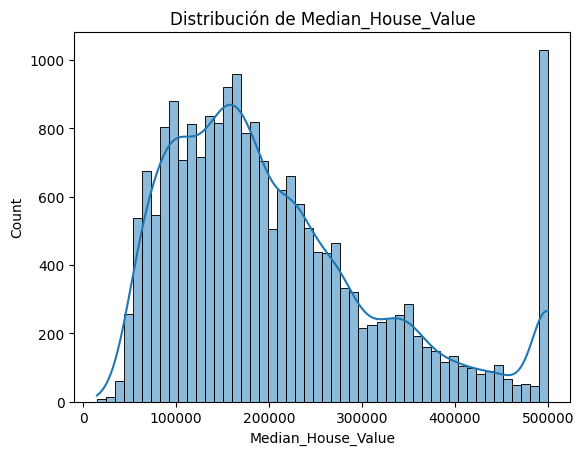

In [7]:
# Distribución de la variable target 'Median_House_Value'
sns.histplot(data['Median_House_Value'], bins=50, kde=True)
plt.title('Distribución de Median_House_Value')
plt.show()

El histograma confirma visualmente lo que sospechábamos en el describe(). Hay una gran acumulación de valores en la barra del extremo derecho, justo en el límite de 500,000

La distribución está sesgada hacia la derecha (asimétrica positiva). La mayoría de las viviendas se agrupan en valores más bajos (entre 100,000 y 250,000), con una cola larga hacia valores más altos.

## **2.1. Correlación de variables**

In [8]:
corr_matrix = data.corr()
corr_matrix

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248


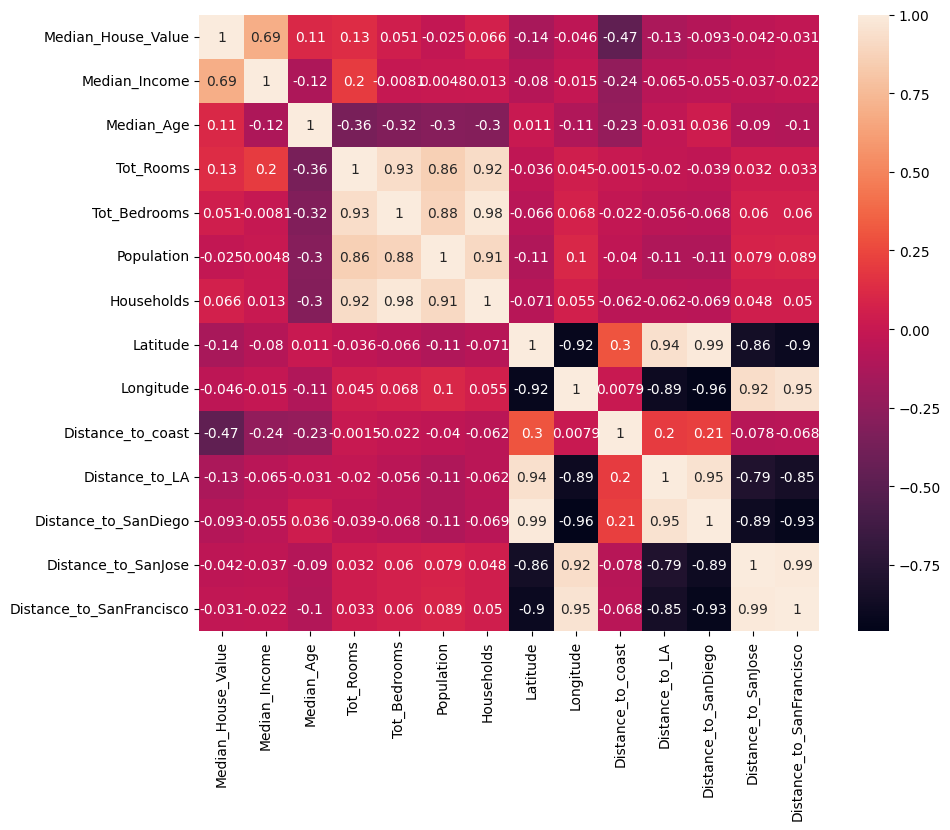

In [9]:
# Visualización de las correlaciones

# Configurar el tamaño del gráfico
plt.figure(figsize=(10,8))

# Creamos el heatmap
sns.heatmap(corr_matrix, annot=True)

plt.show()

- Correlación más Fuerte: Como era de esperar, Median_Income (Ingreso Mediano) tiene la correlación positiva más fuerte con Median_House_Value (0.69). Esto confirma que el ingreso es el predictor individual más potente del precio de la vivienda.
- Correlación Geográfica: Distance_to_coast tiene una correlación negativa significativa (-0.47). Esto significa que a medida que aumenta la distancia a la costa, el valor de la vivienda tiende a disminuir.

- Tot_Rooms, Tot_Bedrooms, Population y Households están muy correlacionadas entre sí (valores > 0.85). Esto es lógico, ya que distritos con más habitaciones suelen tener más población y hogares.
- Las variables de distancia (Distance_to_LA, Distance_to_SanDiego, Distance_to_SanJose, Distance_to_SanFrancisco) y las coordenadas (Latitude, Longitude) también presentan una fuerte correlación entre ellas.

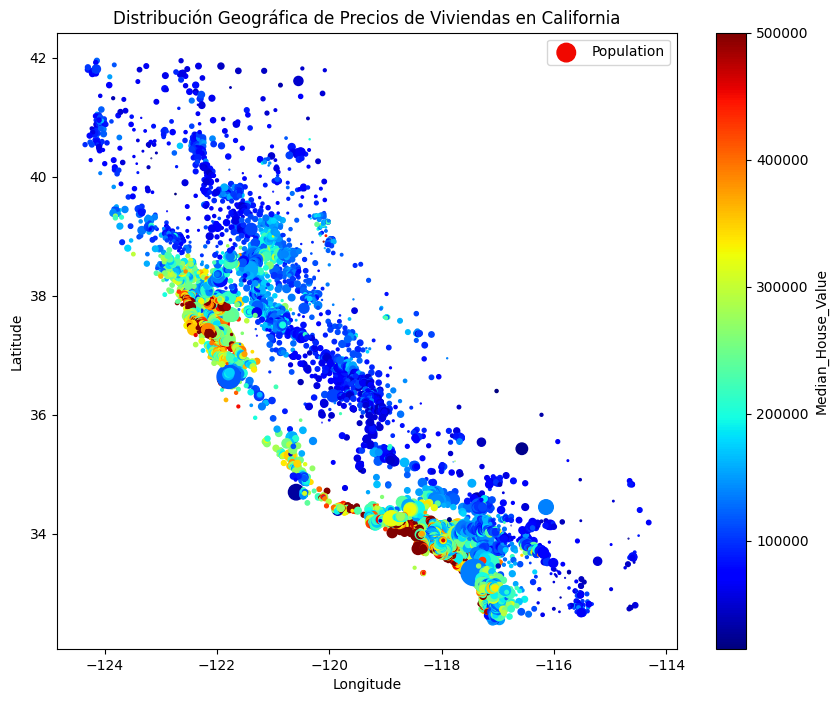

In [10]:
# Visualización Geoespacial de Precios
data.plot(
    kind = 'scatter',
    x = 'Longitude',
    y = 'Latitude',
    c = 'Median_House_Value',
    s = data['Population']/100,
    label = 'Population',
    figsize = (10,8),
    cmap = plt.get_cmap('jet'),
    colorbar = True,
    sharex = False

)
plt.legend()
plt.title('Distribución Geográfica de Precios de Viviendas en California')
plt.show()

- Los datos confirman de manera clara y visual lo que las correlaciones indicaban: los precios de las viviendas presentan variaciones significativas a lo largo del estado de California.
- Los tonos cálidos, como el rojo y el naranja, que indican los precios más elevados, se distribuyen de manera notable en las zonas costeras, particularmente en las grandes áreas como Los Ángeles al sur y el Área de la Bahía de San Francisco al norte.

## **2.2. Dispersión espacial de los precios**

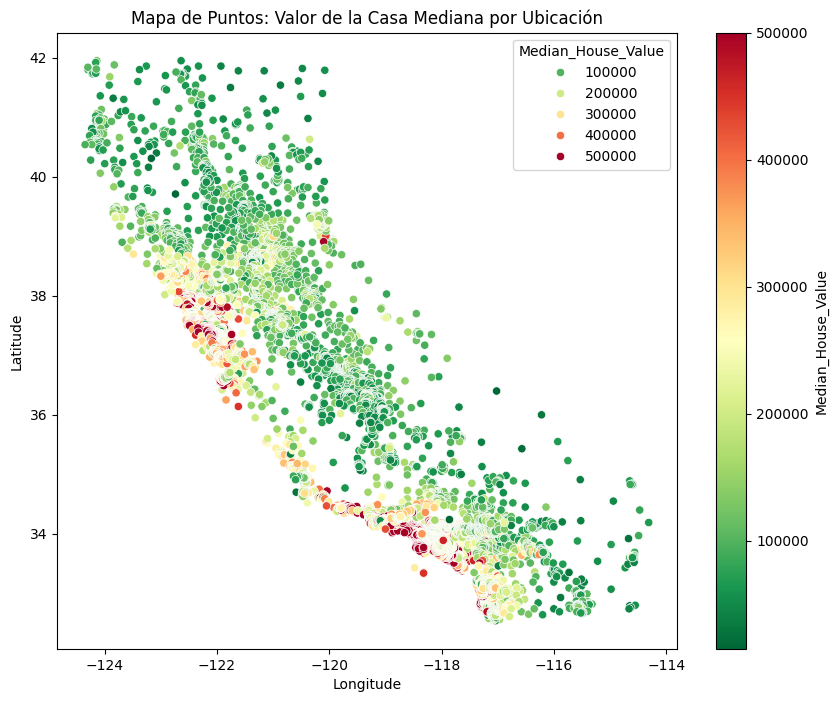

In [11]:
# Figura diagrama de dispersión en un mapa

palette = sns.color_palette("RdYlGn_r", as_cmap=True) # Invertimos para tener verde en valores bajos y rojo en altos

# Normalización de los valores
norm = plt.Normalize(data['Median_House_Value'].min(), data['Median_House_Value'].max())

# Objeto ScalarMappable para la barra de color
sm = mpl.cm.ScalarMappable(cmap=palette, norm=norm)

# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(10,8))

# Gráfico de dispersión
sns.scatterplot(
    data=data,
    x = 'Longitude',
    y = 'Latitude',
    hue = 'Median_House_Value',
    palette = palette,
    hue_norm = norm,
    ax = ax
)
ax.set_title('Mapa de Puntos: Valor de la Casa Mediana por Ubicación')

# Agregar barra de color
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Median_House_Value')

plt.show()

Se confirma que los puntos rojos, que indican precios más altos, se concentran notablemente en la costa de Los Ángeles y San Diego, así como en el Área de la Bahía (San Francisco, San José). En contraste, el interior del estado, como el Valle Central, presenta una predominancia de puntos verdes, que representan precios más bajos.

## **2.3. Visualización de la Densidad de Valores de Casas por Ubicación**

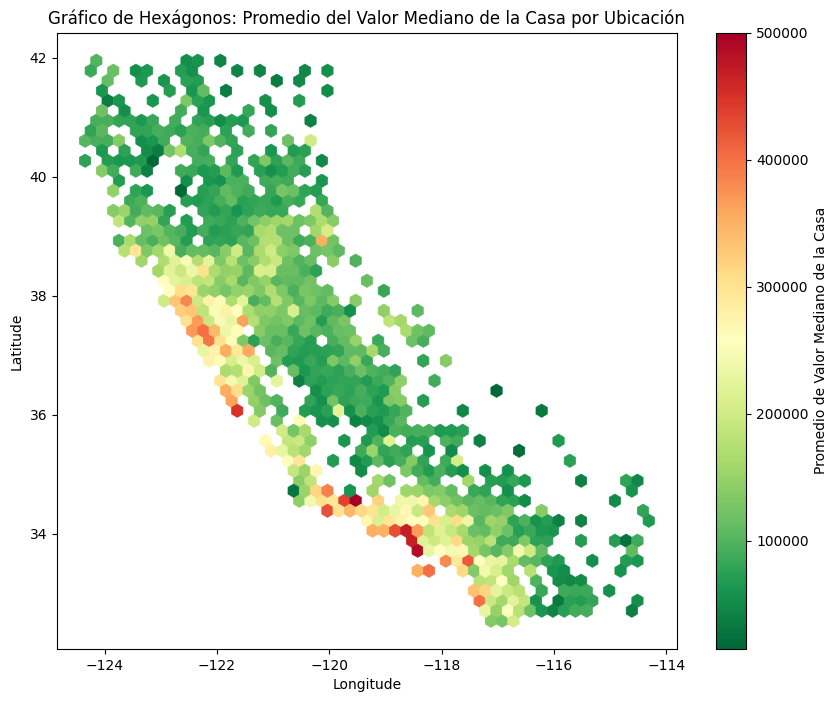

In [12]:
# Normalización de los valores
norm = Normalize(vmin=data['Median_House_Value'].min(), vmax=data['Median_House_Value'].max())

# Figura y ejes
fig, ax = plt.subplots(figsize=(10,8))

# Gráfico hexbin: promedio del valor mediano por ubicación
hb = ax.hexbin(
    data['Longitude'],
    data['Latitude'],
    C = data['Median_House_Value'],
    reduce_C_function = np.mean,
    gridsize = 50,
    cmap = 'RdYlGn_r',
    norm = norm,
    linewidths = 0.5
)

# Barra de colores
cbar = fig.colorbar(hb, ax=ax)
cbar.set_label("Promedio de Valor Mediano de la Casa")

# Títulos y etiquetas
ax.set_title("Gráfico de Hexágonos: Promedio del Valor Mediano de la Casa por Ubicación")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

- Se identifican áreas con tonalidades más intensas de color rojo, especialmente en el sur de California, alrededor de Los Ángeles, y en la costa cercana a San Francisco, lo que indica que estas regiones presentan los precios de vivienda más altos.
- Las áreas con tonalidades de verde más oscuro indican regiones donde el precio promedio de las viviendas es considerablemente más bajo, como se observa en el interior del estado de California.

In [13]:
import folium

# Centro del mapa (promedio de latitudes y longitudes)
center_lat = data['Latitude'].mean()
center_lon = data['Longitude'].mean()

map_points = folium.Map(
    location = [center_lat, center_lon],
    zoom_start = 5
)

folium.CircleMarker(
    location = [center_lat, center_lon]
).add_to(map_points)
map_points

El mapa generado representa con precisión el estado de California, así como un punto que indica el "corazón" geográfico del conjunto de datos. Este resultado actúa como una prueba inicial efectiva para validar el funcionamiento y establecer un punto de referencia.

In [14]:
# Centro del mapa (promedio de latitud y longitud)
center_lat = data['Latitude'].mean()
center_lon = data['Longitude'].mean()

map_points = folium.Map(
    location = [center_lat, center_lon],
    zoom_start = 10
)

for idx, row in data.iterrows():
  folium.CircleMarker(
      location = [row['Latitude'], row['Longitude']],
      radius = 3,  # Tamaño del punto
      color = None,  # sin borde
      fill = True,
      fill_color = 'blue', # color del punto
      fill_opacity = 0.6,
      popup = f"House Value: {row['Median_House_Value']}"
  ).add_to(map_points)
# map_points.save("mapa_puntos.html")

map_points

Output hidden; open in https://colab.research.google.com to view.

El mapa se completa con todos los puntos de datos, ilustrando la distribución geográfica de los distritos. No obstante, al ser todos los puntos del mismo color ('azul'), resulta imposible distinguir entre áreas de alto y bajo valor. Este mapa es efectivo para visualizar la densidad de datos, pero no los precios. Se confirma visualmente el problema de la superposición de puntos en áreas densas.

In [15]:
import branca.colormap as cm

# Centro del mapa
center = [data['Latitude'].mean(), data['Longitude'].mean()]

# Crear colormap con escala entre valores mínimo y máximo
colormap = cm.linear.RdYlGn_11.scale(data['Median_House_Value'].min(), data['Median_House_Value'].max())

# Crear mapa base
map_colored = folium.Map(
    location = center,
    zoom_start = 10
)

# agregar puntos con color según Median_House_Value
for _, row in data.iterrows():
  color = colormap(row['Median_House_Value'])
  folium.CircleMarker(
      [row['Latitude'], row['Longitude']],
      radius = 5,
      color = color,
      fill = True,
      fill_color = color,
      fill_opacity = 0.7,
      popup = f"House Value: {row['Median_House_Value']}"
  ).add_to(map_colored)

# Añadir leyenda
colormap.caption = 'Median_House_Value'
colormap.add_to(map_colored)

# Guardar archivo HTML
# map_colored.save("mapa_puntos_coloreados.html")

map_colored

Output hidden; open in https://colab.research.google.com to view.

Este mapa integra la claridad visual del hexbin estático con la interactividad de Folium. Podemos hacer zoom, desplazarnos por el mapa y seleccionar puntos específicos para obtener su valor exacto. Los patrones de precios elevados (rojo) en la costa y precios reducidos (verde) en el interior son ahora más evidentes.

In [16]:
from folium.plugins import HeatMap

map_heat = folium.Map(
    location = [center_lat, center_lon],
    zoom_start = 10
)

heat_data = data[['Latitude', 'Longitude']].values.tolist()

HeatMap(
    data = heat_data,
    radius = 8,
    blur = 10,
    max_zoom = 13
).add_to(map_heat)

# map_heat.save('mapa_calor.html')

map_heat

Este mapa de calor ilustra la distribución de puntos de datos (viviendas) en nuestro dataset a través de California. Los tonos más intensos, que varían del azul al verde y amarillo brillante, reflejan una mayor densidad de viviendas, mientras que los tonos más fríos indican una menor cantidad de propiedades registradas.

In [17]:
from folium.plugins import HeatMap

map_heat_weighted = folium.Map(
    location = [center_lat, center_lon],
    zoom_start = 10
)

# Preparamos la lista con [lat, lon, peso]
heat_data_weighted = data[['Latitude', 'Longitude', 'Median_House_Value']].values.tolist()

HeatMap(
    data = heat_data_weighted,
    radius = 12,
    max_zoom = 13
).add_to(map_heat_weighted)

# map_heat_weighted.save("mapa_calor_ponderado.html")

map_heat_weighted

Este mapa de calor proporciona información considerablemente más valiosa para nuestro proyecto de predicción. A diferencia del anterior, no solo representa la densidad de viviendas, sino que también ajusta esa densidad en función al precio de las viviendas. Esto implica que las áreas con precios de viviendas más elevados se destacarán con colores más intensos, incluso si la cantidad de viviendas no es la más alta. Además, se centra en el promedio de latitud y longitud de los datos.

#**3. Preprocesamiento de Datos**


---

 ## 3.1 Evaluando Outliers

In [18]:
# Diccionario límites donde cada columna se asocia al valor 0.98
limites = {columna: 0.98 for columna in data.columns}
limites

{'Median_House_Value': 0.98,
 'Median_Income': 0.98,
 'Median_Age': 0.98,
 'Tot_Rooms': 0.98,
 'Tot_Bedrooms': 0.98,
 'Population': 0.98,
 'Households': 0.98,
 'Latitude': 0.98,
 'Longitude': 0.98,
 'Distance_to_coast': 0.98,
 'Distance_to_LA': 0.98,
 'Distance_to_SanDiego': 0.98,
 'Distance_to_SanJose': 0.98,
 'Distance_to_SanFrancisco': 0.98}

In [19]:
def clear_hist(df, x):
  print(f'---{x}---')

  # Límite del percentil 98
  limite = df[x].quantile(0.98)

  # Creamos la figura
  fig, axes = plt.subplots(1, 2, figsize=(10,4))

  # Histograma original
  sns.histplot(df[x], bins=10, kde=False, ax=axes[0])
  axes[0].set_title(f'{x} - Original')

  # Histograma sin outliers
  sns.histplot(df[df[x] <= limite][x], bins=10, kde=False, ax=axes[1])
  axes[1].set_title(f'{x} - Sin top 2%')

  # Ajustamos la gráfica y lo mostramos
  plt.tight_layout()
  plt.show()

---Median_House_Value---


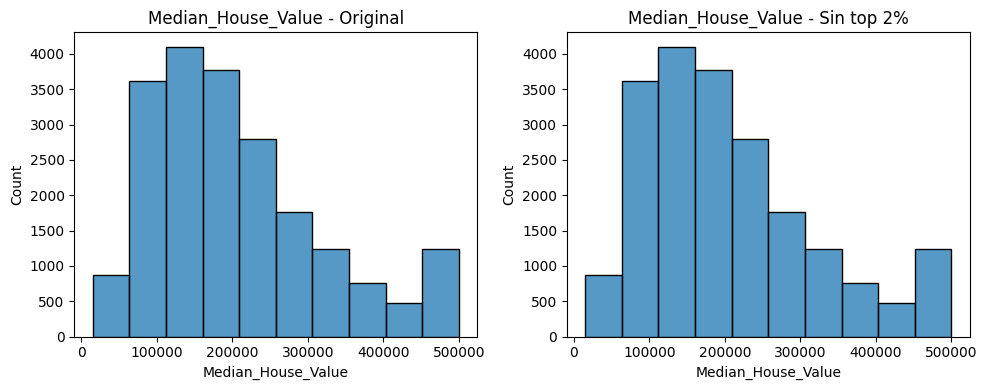

---Median_Income---


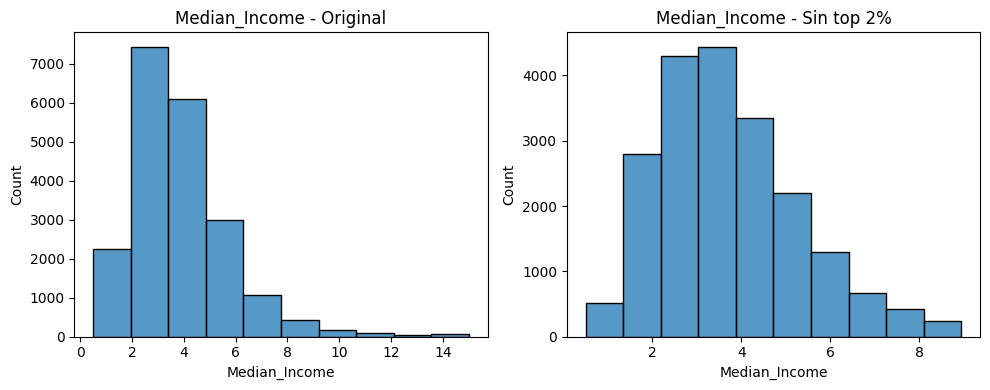

---Median_Age---


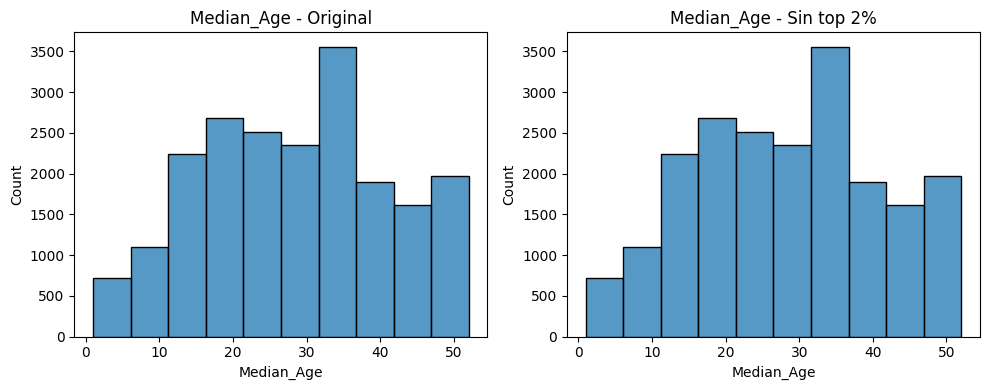

---Tot_Rooms---


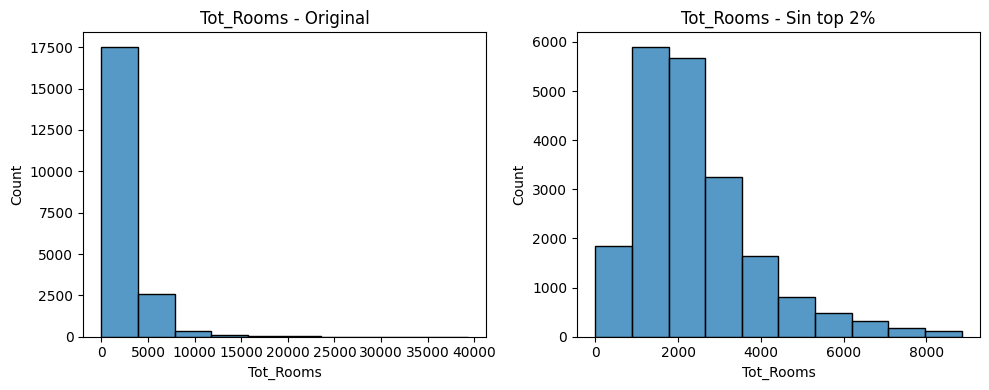

---Tot_Bedrooms---


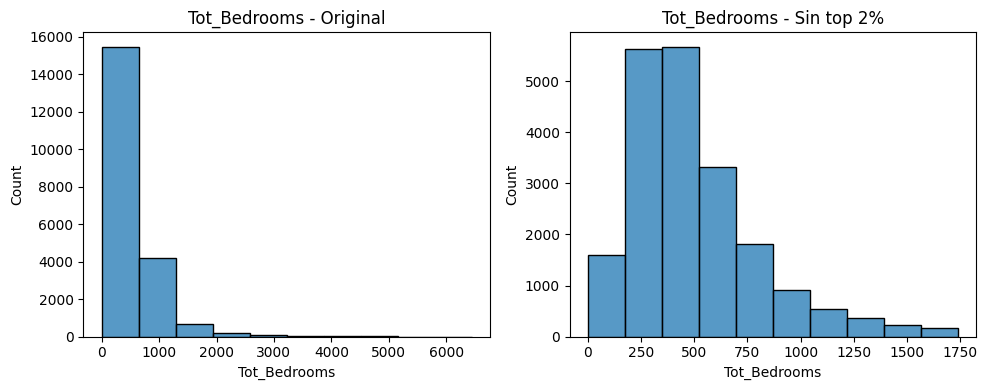

---Population---


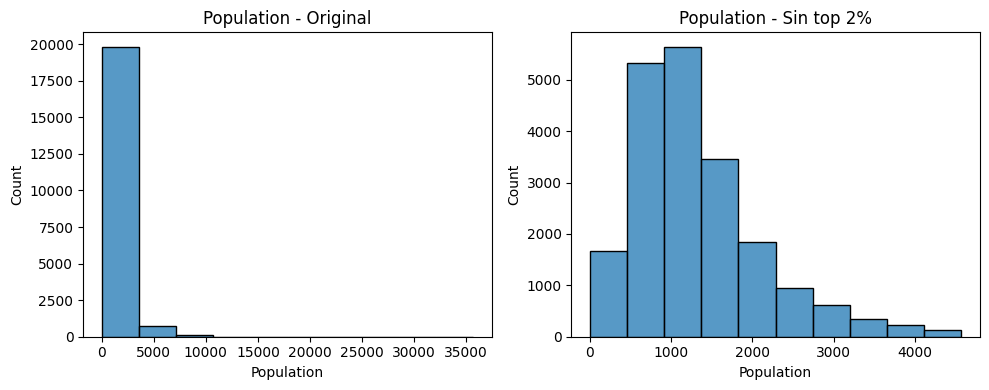

---Households---


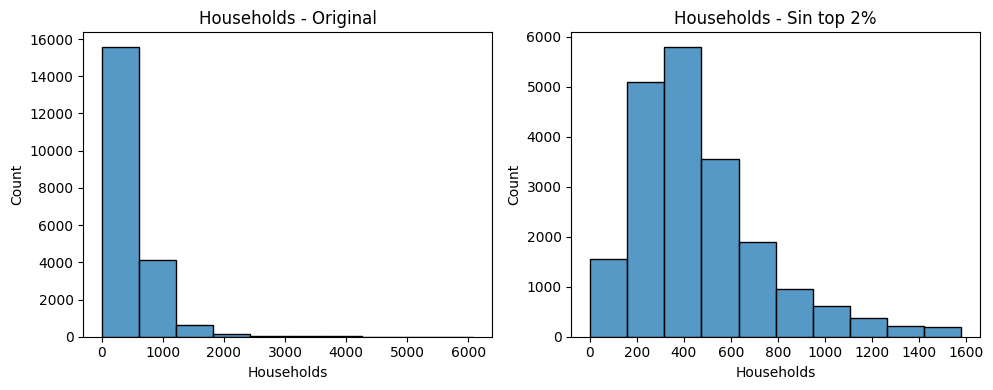

---Latitude---


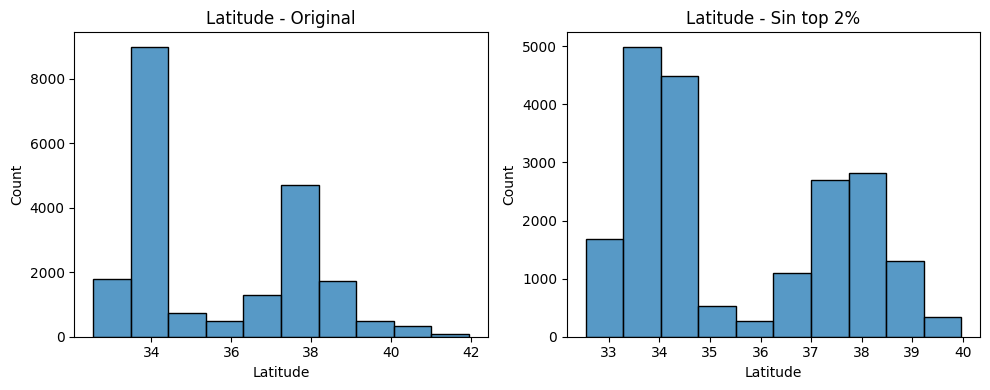

---Longitude---


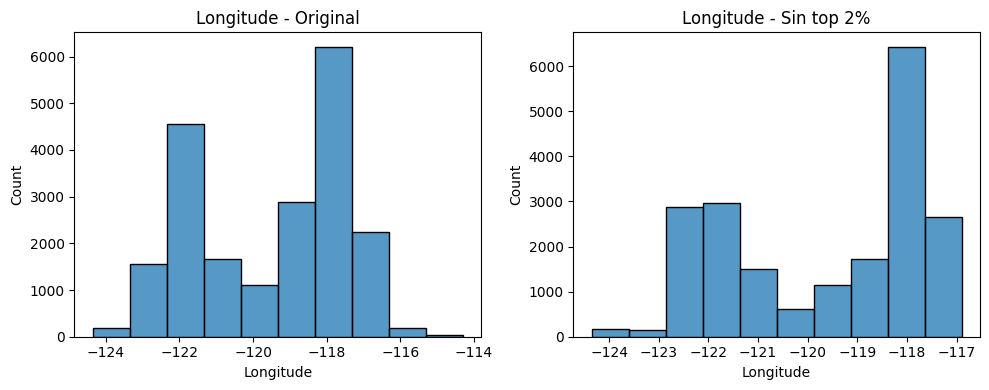

---Distance_to_coast---


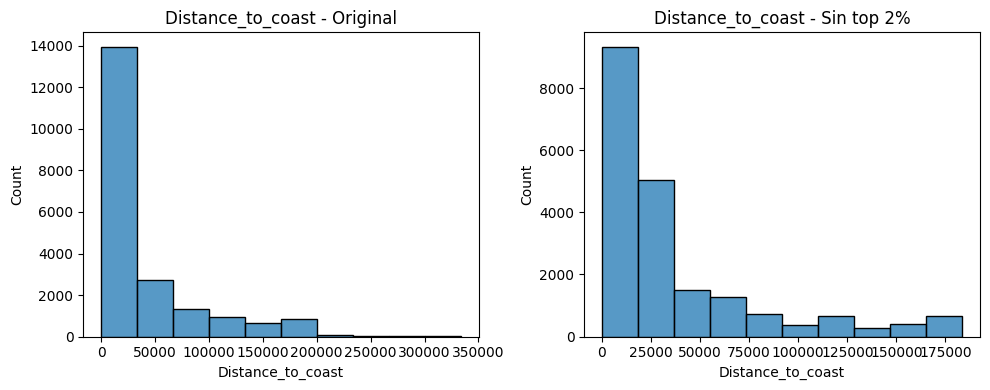

---Distance_to_LA---


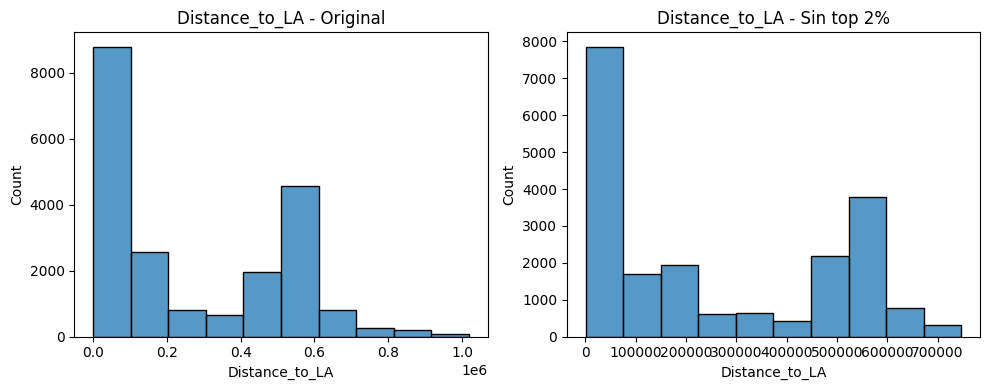

---Distance_to_SanDiego---


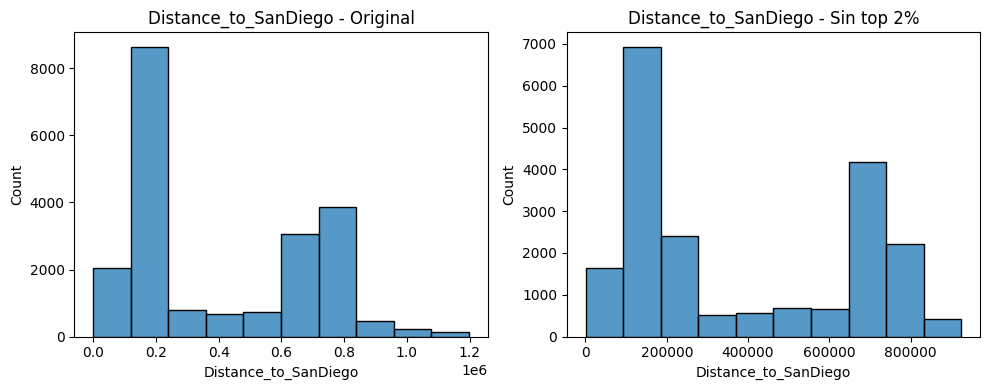

---Distance_to_SanJose---


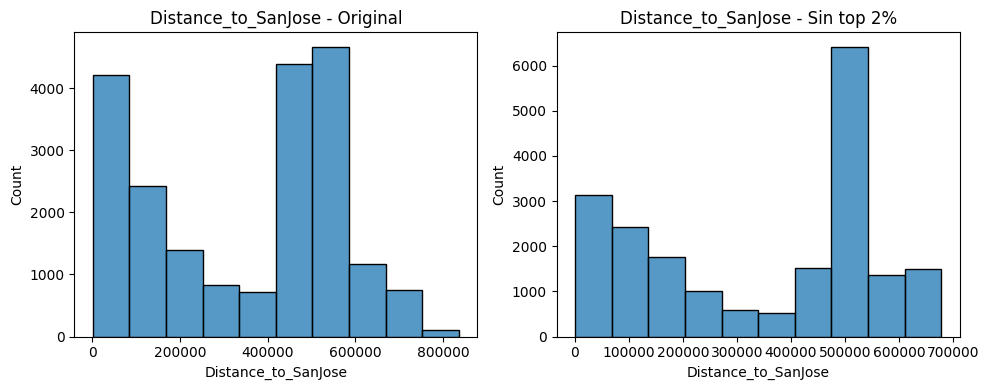

---Distance_to_SanFrancisco---


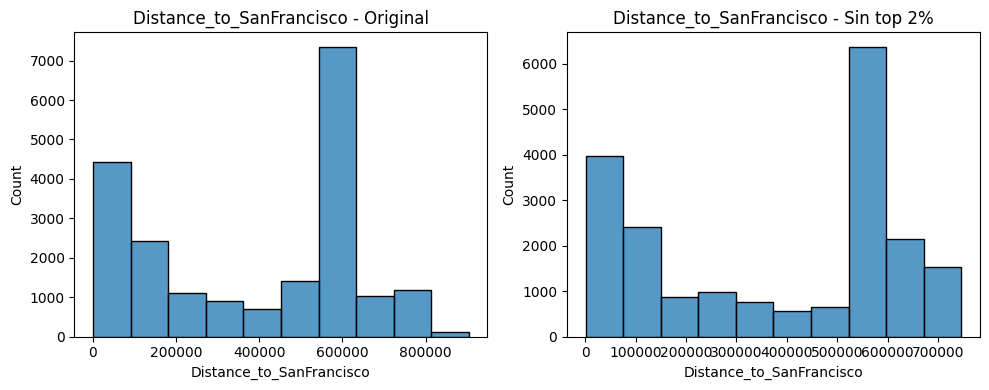

In [20]:
for x in data.columns:
  clear_hist(data, x)

Se busca ilustrar el impacto visual de los outliers en la distribución de cada característica. Para lograr esto, se ha desarrollado una función llamada clear_hist que produce dos histogramas de cada una de las variables: uno que muestra la distribución original y otro que restringe los valores por encima del percentil 98. El propósito es analizar la concentración de valores atípicos extremos y su influencia en la visualización de la distribución principal.

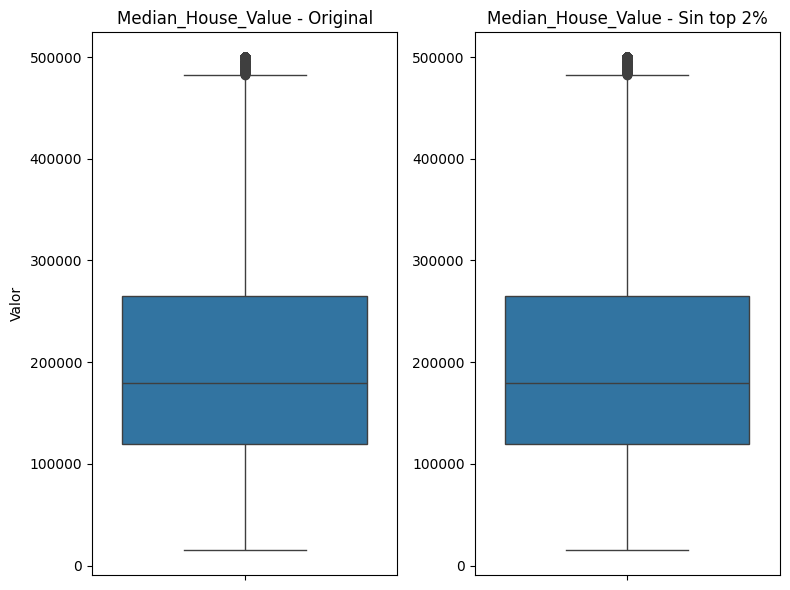

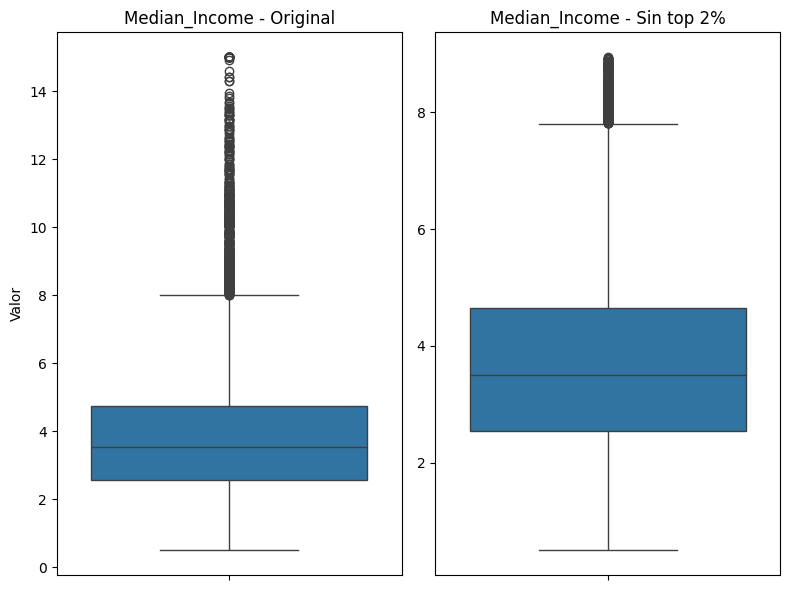

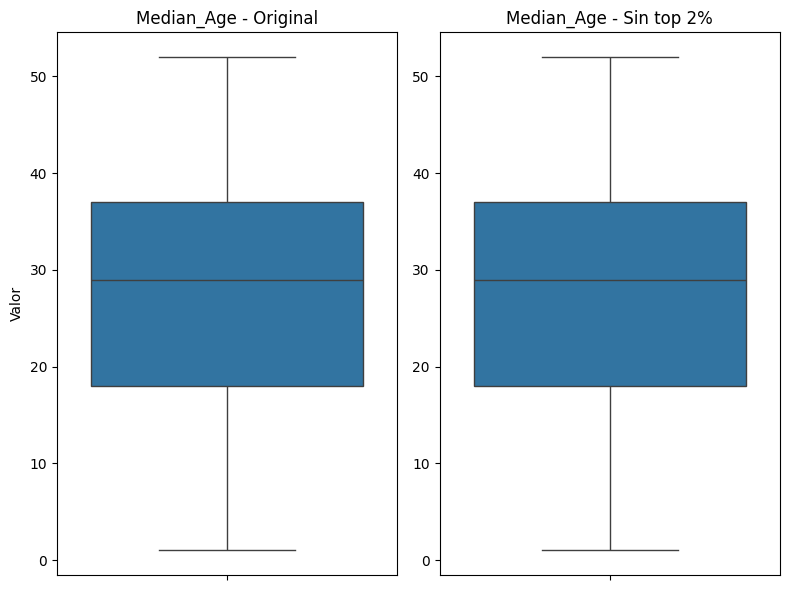

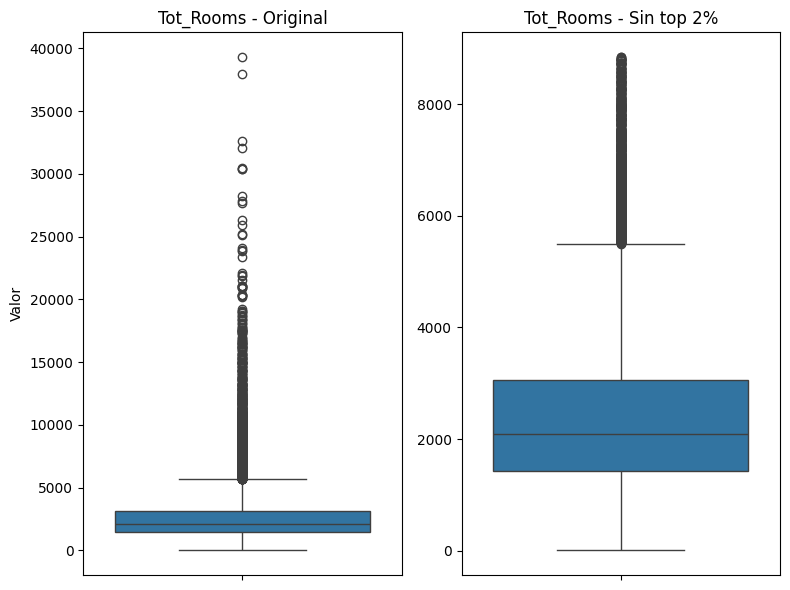

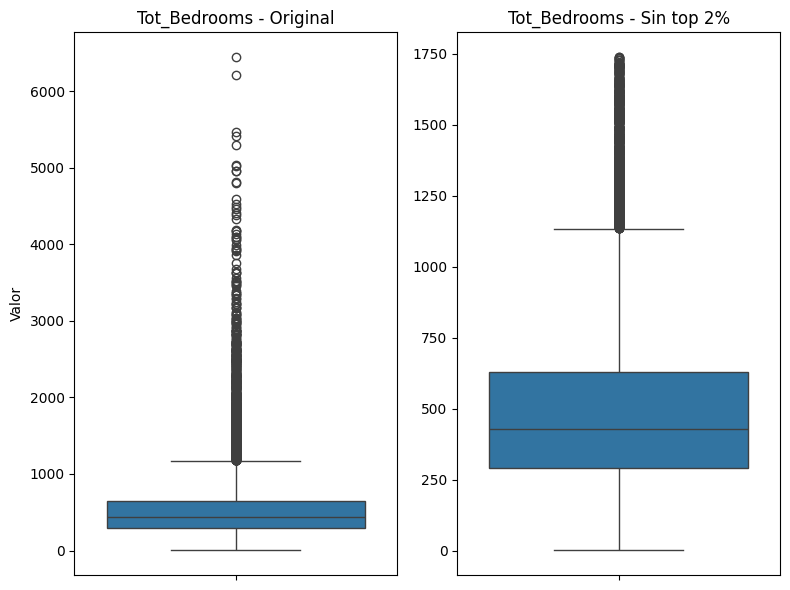

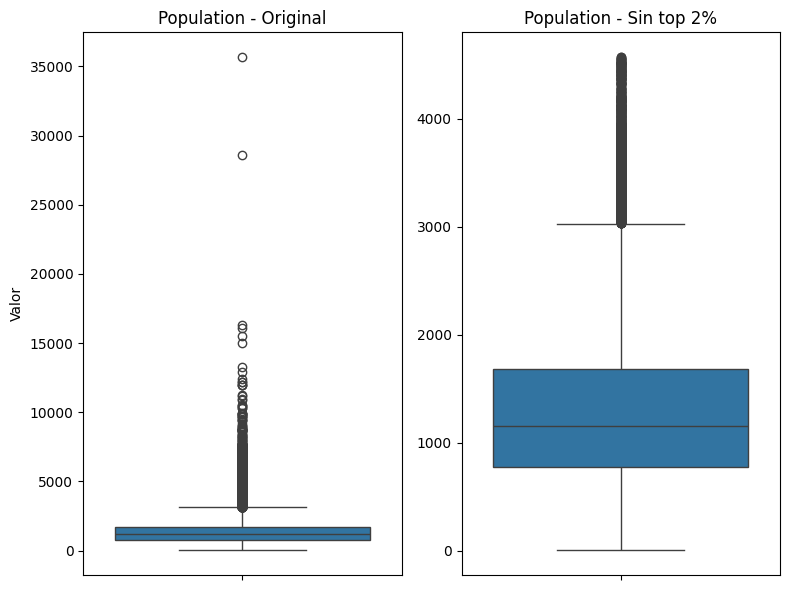

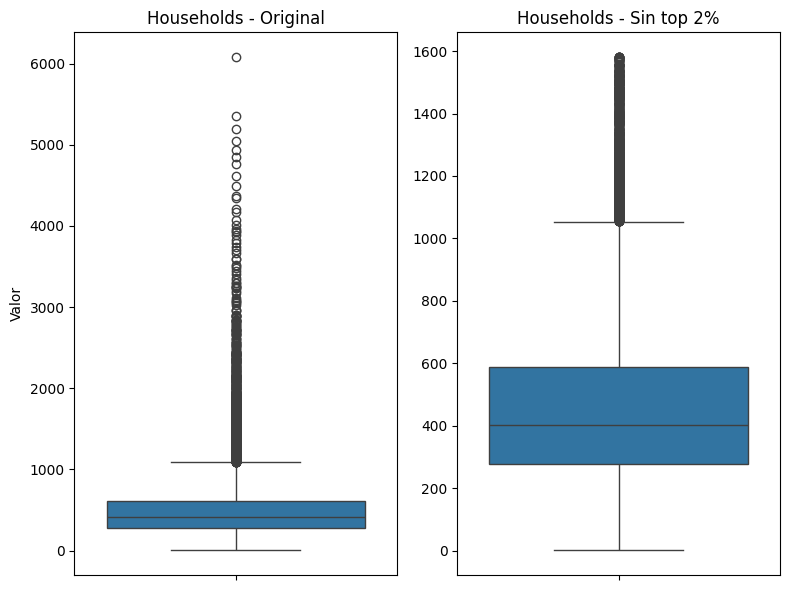

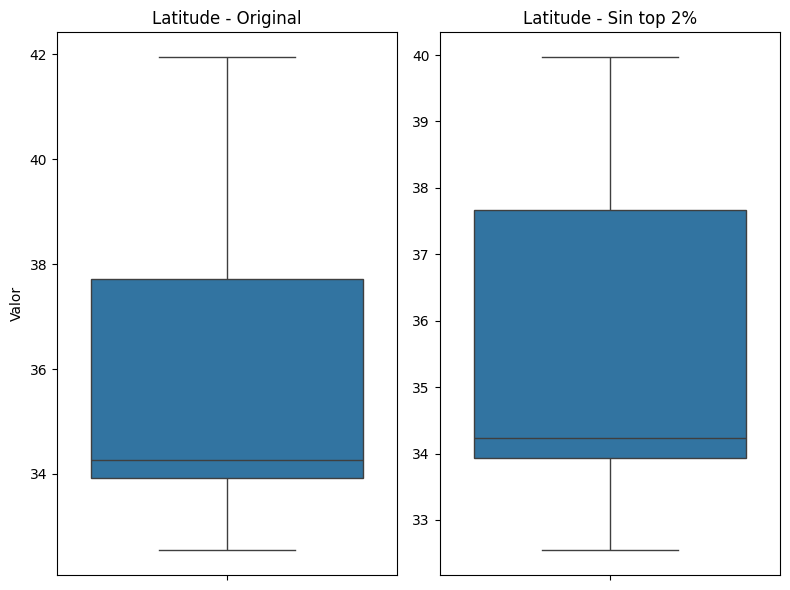

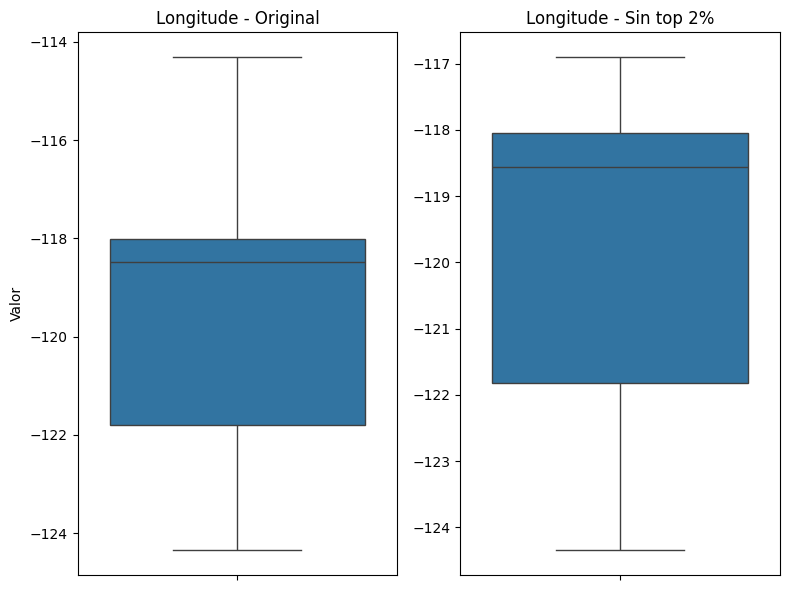

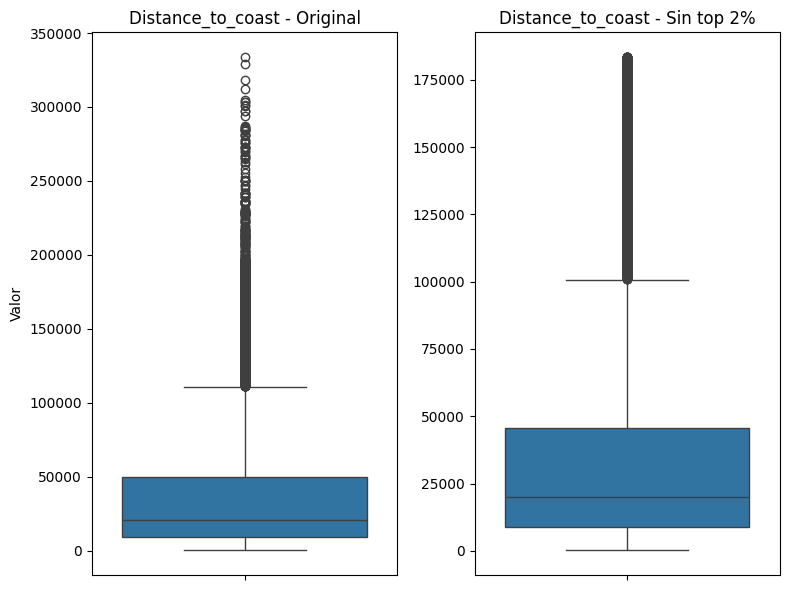

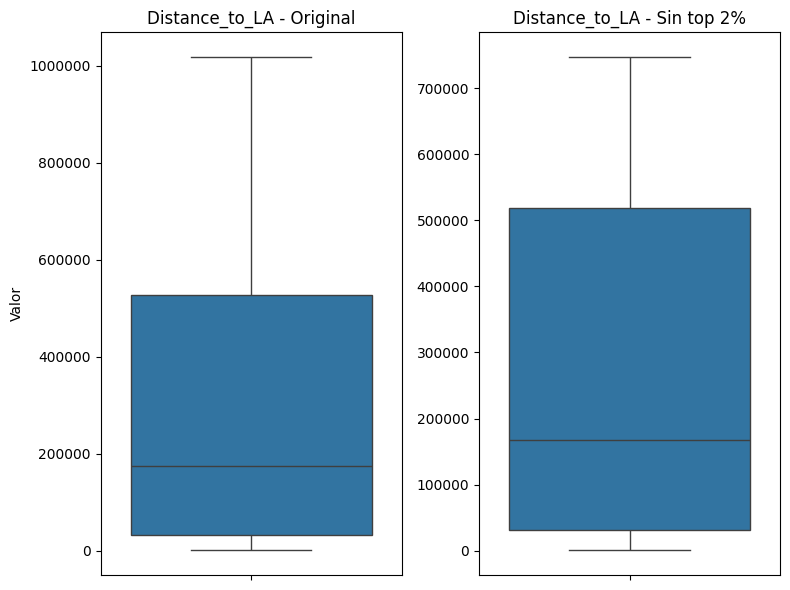

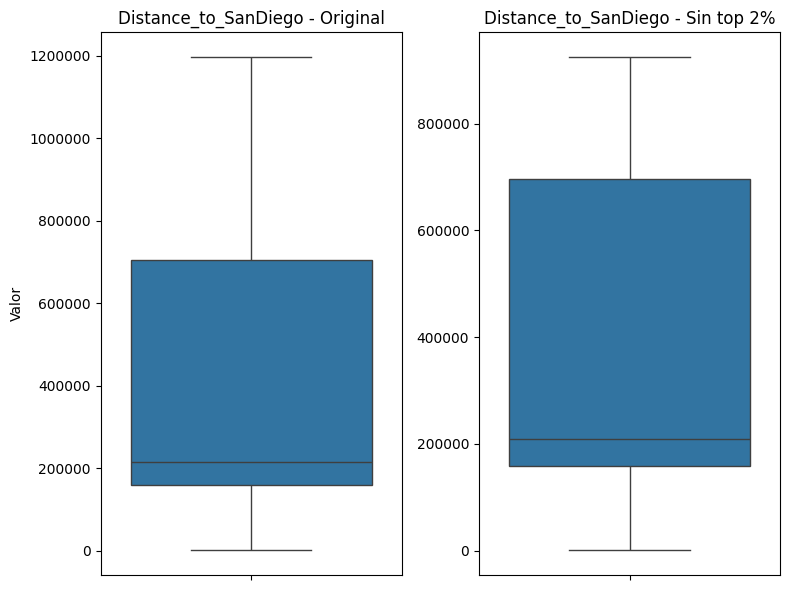

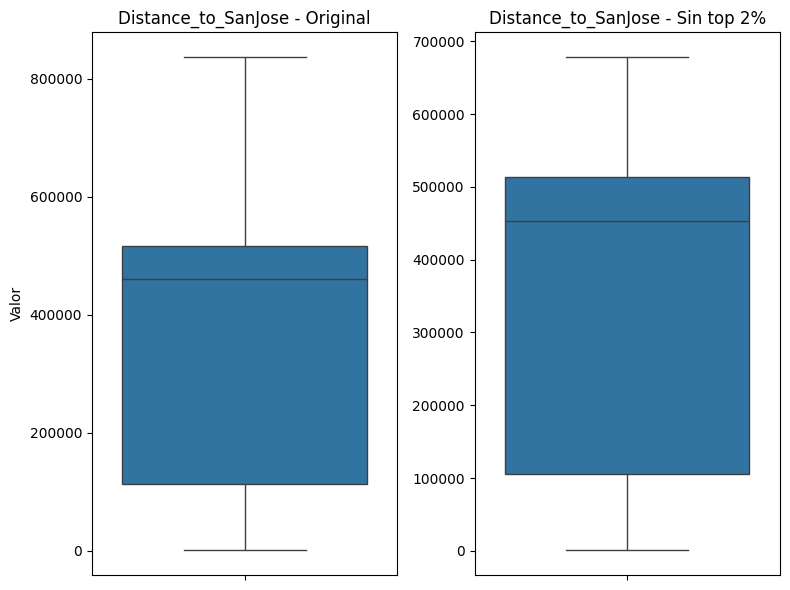

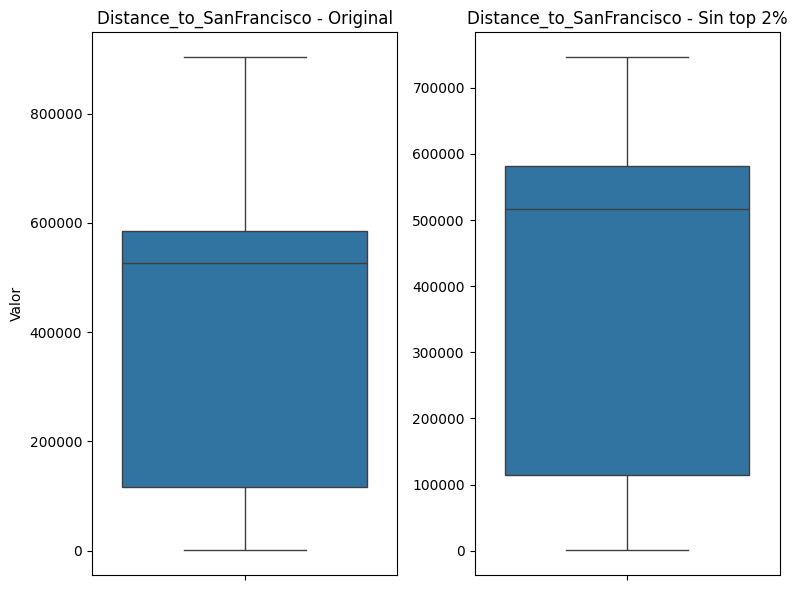

In [21]:
# Iteramos sobre todas las columnas para generar los boxplots
for col in data.columns: # Usamos data.columns para asegurar que iteramos por todas las originales
  fig, axes = plt.subplots(1, 2, figsize=(8, 6)) # Una fila, dos columnas para comparación

  # Box Plot del DataFrame original
  sns.boxplot(y=data[col], ax=axes[0])
  axes[0].set_title(f'{col} - Original')
  axes[0].set_ylabel('Valor') # Etiqueta del eje Y para claridad
  axes[0].ticklabel_format(style='plain', axis='y') # Evita notación científica en Y


  # Límite del percentil 98
  limite = data[col].quantile(0.98)
  # Box Plot del DataFrame truncado
  sns.boxplot(data[data[col] <= limite][col], ax=axes[1])
  axes[1].set_ylabel('') # Etiqueta del eje Y para claridad
  axes[1].set_title(f'{col} - Sin top 2%')

  plt.tight_layout()
  plt.show()

Con el objetivo de enriquecer nuestro análisis de histogramas, hemos creado boxplots comparativos que ofrecen una perspectiva más detallada sobre el impacto de nuestro tratamiento de outliers. En cada conjunto de gráficos, el de la izquierda representa la distribución original, mientras que el de la derecha ilustra la distribución tras truncar el 2% superior de los datos.

## 3.2 Truncando la variable

In [22]:
# Truncamiento de variables

for var, limit in limites.items():

  # Valor mínimo de cada columna
  min_val = data[var].min()

  # Límite superior para cada columna
  upper_limit = data[var].quantile(limit)

  # Truncar los valores usando .clip()
  data[var] = data[var].clip(lower=min_val, upper=upper_limit)

---Median_House_Value---


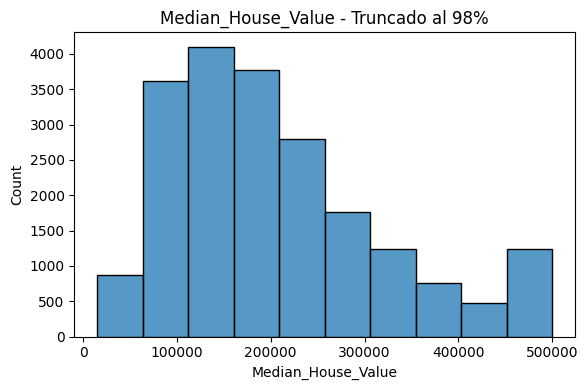

---Median_Income---


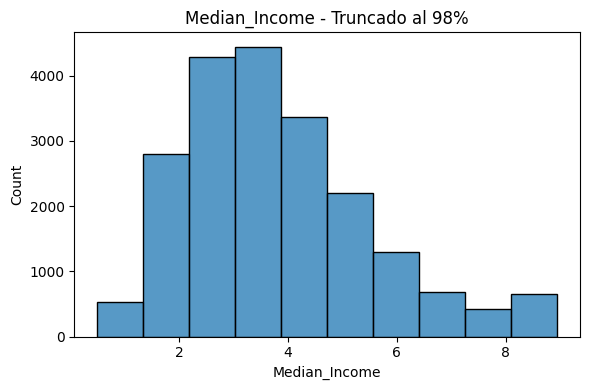

---Median_Age---


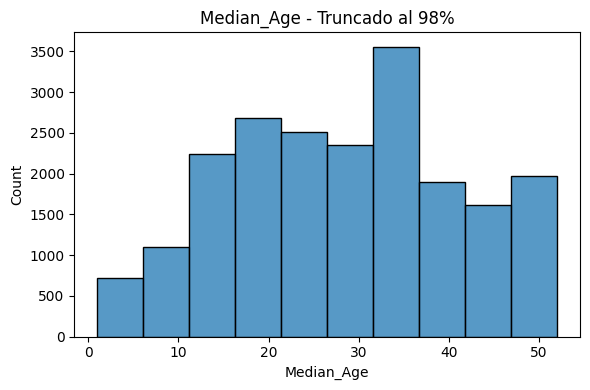

---Tot_Rooms---


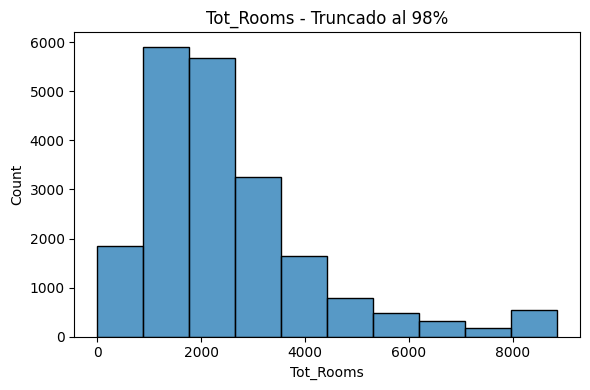

---Tot_Bedrooms---


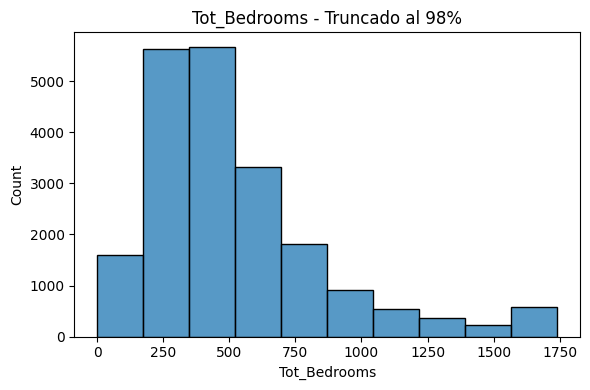

---Population---


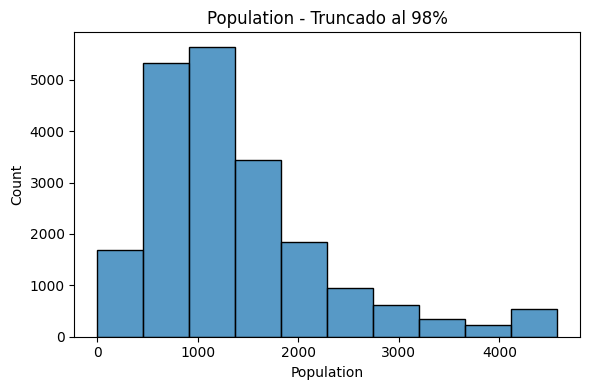

---Households---


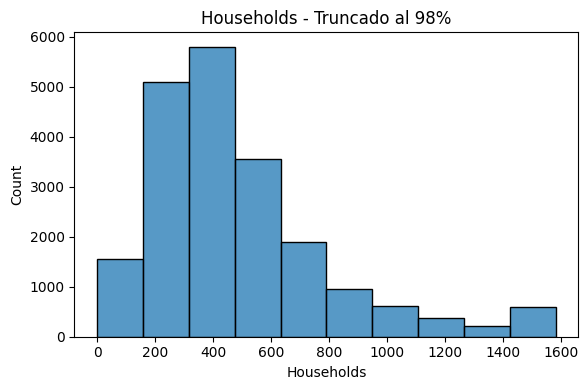

---Distance_to_coast---


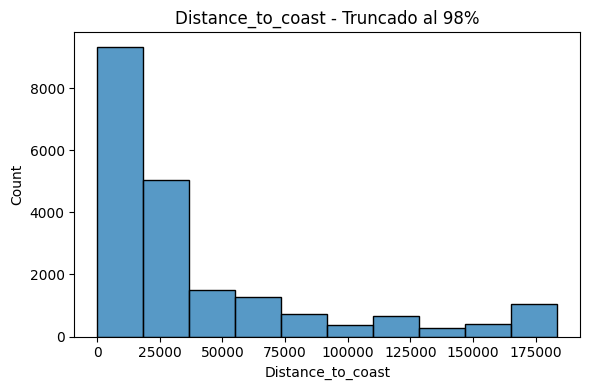

---Distance_to_LA---


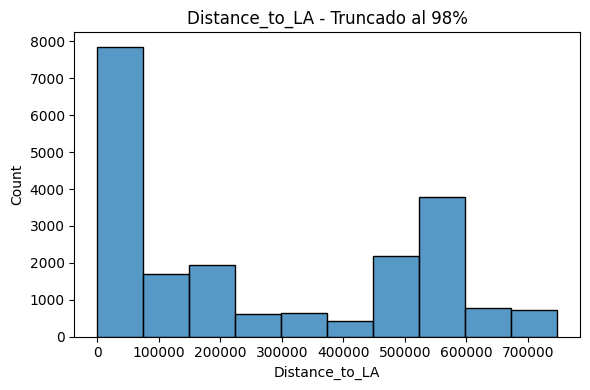

---Distance_to_SanDiego---


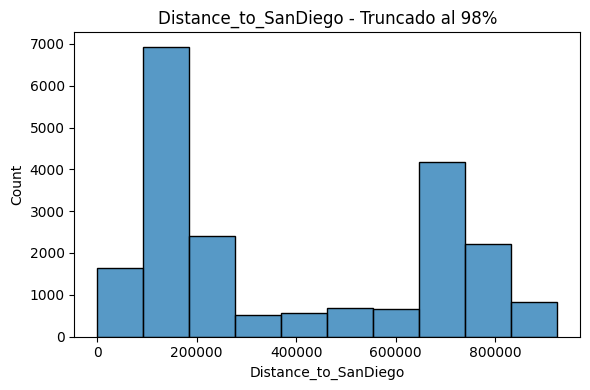

---Distance_to_SanJose---


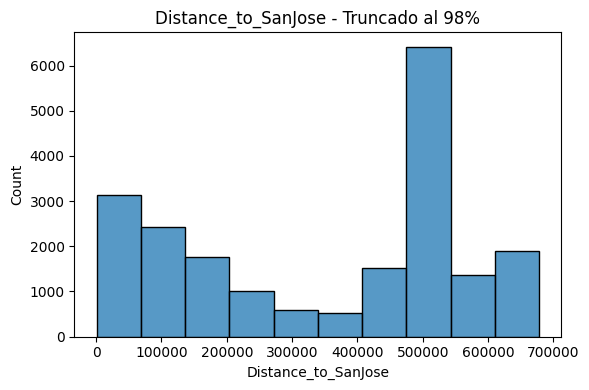

---Distance_to_SanFrancisco---


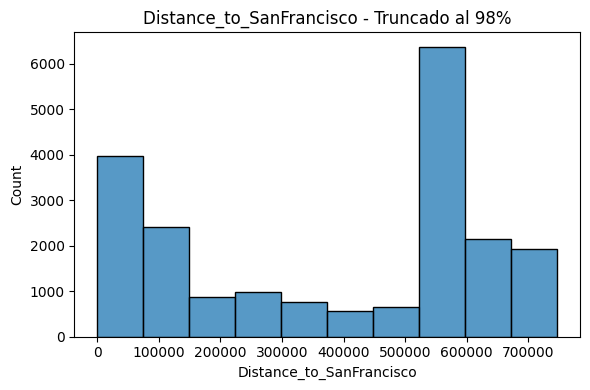

In [23]:
# Visualización de histogramas truncados

# Eliminamos las variables 'Latitude' y 'Longitude'
vars = data.columns.drop(['Latitude', 'Longitude'])

for x in vars:
  print(f'---{x}---')
  plt.figure(figsize=(6,4))
  sns.histplot(data[x], bins=10, kde=False)
  plt.title(f'{x} - Truncado al 98%')
  plt.tight_layout()
  plt.show()

Se gestionan los valores atípicos en todas las columnas del dataset mediante truncamiento. Se crea un diccionario que asocia cada columna con el percentil 98 (0.98). Posteriormente, se calcula el percentil 98 de cada columna, recortando los valores que exceden este umbral y manteniendo los valores inferiores en su mínimo original. Este método busca reducir el impacto de valores extremadamente altos que podrían distorsionar el análisis estadístico y el rendimiento de los modelos de Machine Learning que se implementarán, logrando distribuciones de variables más robustas.

#**4. Construcción de Modelos**


---

In [24]:
data['Median_House_Value'].describe()

,Median_House_Value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


In [25]:
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880.0,129.0,322.0,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099.0,1106.0,2401.0,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467.0,190.0,496.0,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274.0,235.0,558.0,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627.0,280.0,565.0,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
X = data.drop('Median_House_Value', axis=1)
y = data['Median_House_Value']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.1 xgboost

In [29]:
import xgboost as xgb

# Inicio del conteo de tiempo antes del entrenamiento del modelo
start_time = time.time()

# Modelo base de XGBoost
model_xgb_base = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 100,
    learning_rate = 0.1,
    random_state = 42
)

# Entrenamiento del Modelo XGBoost
model_xgb_base.fit(X_train, y_train)

# Calculamos el tiempo transcurrido desde el inicio hasta el final del entrenamiento
xgb_base_time = time.time() - start_time
print(f'Tiempo de entrenamiento del modelo XGBoost base: {xgb_base_time/60:.2f} minutos')

Tiempo de entrenamiento del modelo XGBoost base: 0.03 minutos


El modelo base de XGBoost fue entrenado en aproximadamente 0.05 minutos (3 segundos), lo que representa un tiempo aceptable para un modelo no optimizado que consta de 100 árboles.

In [30]:
# Predicciones de X_test
y_pred_xgb_base = model_xgb_base.predict(X_test)
y_pred_xgb_base

array([ 54122.684,  93841.8  , 507919.6  , ..., 505731.03 ,  83013.38 ,
       177905.25 ], dtype=float32)

In [31]:
# Evaluación del Modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_base))
print(f'RMSE: {rmse}')

RMSE: 46717.60654135768


En promedio, las predicciones del modelo difieren aproximadamente en $46,717.61 respecto a los valores reales de la variable target Median_House_Value

In [32]:
mape_xgboost = np.mean(np.abs((y_test - y_pred_xgb_base) / y_test)) * 100
print(f'MAPE: {mape_xgboost:.2f}%')

MAPE: 17.31%


El MAPE (Error Porcentual Absoluto Medio) señala que, en promedio, este modelo presenta un margen de error del 17.31% en comparación con el valor real de las viviendas.

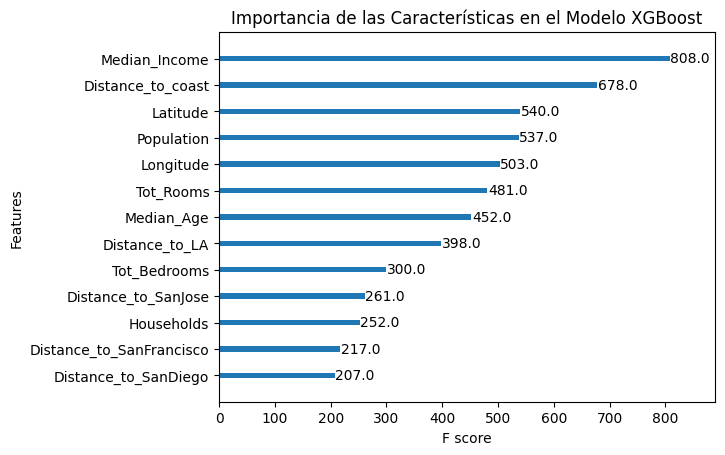

In [33]:
xgb.plot_importance(model_xgb_base)
plt.title('Importancia de las Características en el Modelo XGBoost')
plt.grid(False)
plt.show()

La variable Median_Income (808.0) es, sin duda, la característica más relevante en el modelo, con una correlación directa y significativa con los precios de las viviendas. La variable Distance_to_coast (678.0) es la segunda característica más importante, dado su valor en el mercado inmobiliario de California. Las variables menos relevantes son Tot_Bedrooms, Distance_to_SanJose, Households, Distance_to_SanFrancisco y Distance_to_SanDiego. Esto podría deberse a que Latitude y Longitude ya capturan gran parte de esa información de ubicación general.

In [34]:
# Optimización de hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV

# Inicio del conteo de tiempo antes del entrenamiento del modelo
start_time = time.time()

# Definición del Grid de búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Modelo de base para GridSearch
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    random_state = 42
)

# Búsqueda de los mejores parámetros
grid_search = GridSearchCV(
    estimator = xgb_model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error',
    verbose = 1,
    n_jobs = -1
)

# Entrenar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Calculamos el tiempo transcurrido desde el inicio hasta el final del entrenamiento
xgb_optimized_time = time.time() - start_time
print(f'Tiempo de entrenamiento del modelo XGBoost optimizado: {xgb_optimized_time/60:.2f} minutos')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tiempo de entrenamiento del modelo XGBoost optimizado: 1.87 minutos


El número total de entrenamientos de modelos ejecutados por GridSearchCV se indica aquí. Para cada una de las 27 combinaciones de parámetros, se llevaron a cabo 5 validaciones cruzadas. Esto subraya la naturaleza computacionalmente intensiva de GridSearchCV.

La optimización de hiperparámetros para XGBoost requirió 2.51 minutos, lo que indica un aumento considerable en el tiempo debido a la evaluación de 27 combinaciones de parámetros mediante validación cruzada (5-fold). Este tiempo es razonable para un modelo sofisticado como XGBoost al determinar su configuración óptima.

In [35]:
print('Mejores parámetros encontrados:', grid_search.best_params_)

Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


Los hiperparámetros identificados por GridSearchCV como óptimos para el modelo XGBoost se basan en el rendimiento observado en los conjuntos de validación cruzada. Es relevante destacar que tanto el learning_rate como el n_estimators se encuentran en el límite superior de los rangos establecidos, y max_depth es el valor máximo explorado.

In [36]:
# Hacer predicciones con el mejor modelo
xgb_model = grid_search.best_estimator_
y_pred_optimized = xgb_model.predict(X_test)

In [37]:
# RMSE optimizado
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
print(f'RMSE del modelo optimizado: {rmse_optimized:.2f}')

RMSE del modelo optimizado: 44747.70


La comparación entre el RMSE del modelo base, que es de 46717.61, y el RMSE optimizado de 44747.70, indica una mejora de aproximadamente $1,969.91. Esta reducción en el error es considerable y evidencia la efectividad de la optimización de hiperparámetros.

In [38]:
mape_xgboost_optimizado = np.mean(np.abs((y_test - y_pred_optimized) / y_test)) * 100
print(f'MAPE del modelo XGBoost optimizado: {mape_xgboost_optimizado:.2f}%')

MAPE del modelo XGBoost optimizado: 16.12%


Reducir de 17.31% a 16.12% implica que el modelo ahora presenta una mayor precisión relativa en sus predicciones. Además, sugiere que el modelo está generalizando de manera más efectiva en los datos de prueba, evitando el sobreajuste.

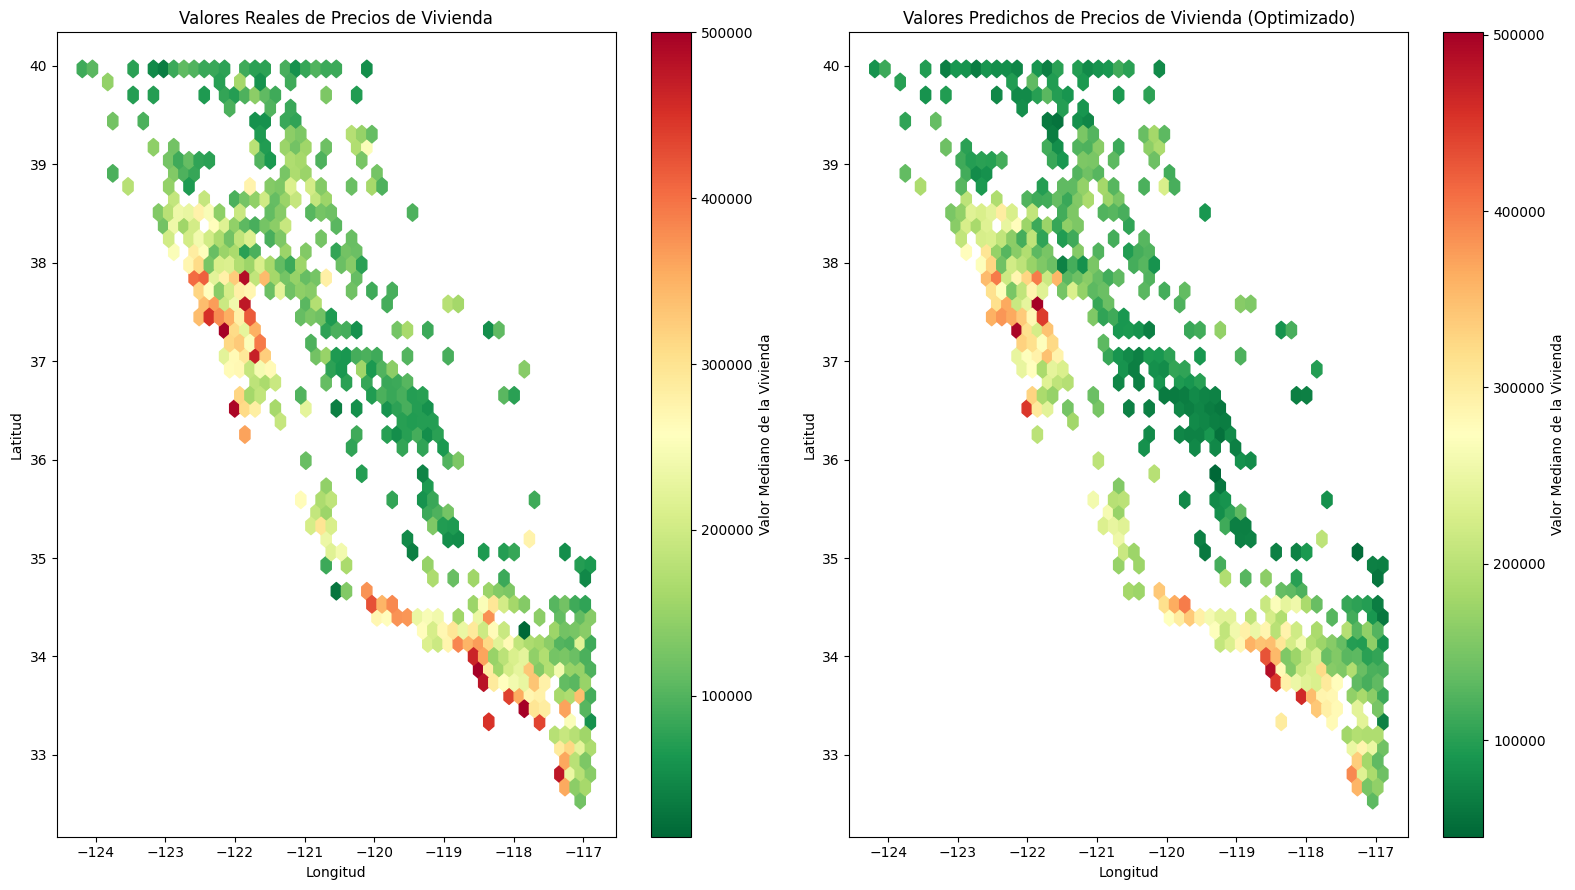

In [39]:
# Gráfico comparativo
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# Gráfico 1: Valores Reales del Precio Mediano de las Viviendas
hb1 = ax[0].hexbin(
    X_test['Longitude'],
    X_test['Latitude'],
    C=y_test, # Colorea según el valor mediano real de la vivienda
    reduce_C_function = np.mean,
    gridsize=50, # Ajusta el tamaño de los hexágonos según se desee
    cmap='RdYlGn_r',
    mincnt=1 # Número mínimo de puntos en un bin para ser mostrado
)
ax[0].set_title('Valores Reales de Precios de Vivienda')
ax[0].set_xlabel('Longitud')
ax[0].set_ylabel('Latitud')
fig.colorbar(hb1, ax=ax[0], label='Valor Mediano de la Vivienda')

# Gráfico 2: Valores Predichos del Precio Mediano de las Viviendas
hb2 = ax[1].hexbin(
    X_test['Longitude'],
    X_test['Latitude'],
    C=y_pred_optimized, # Colorea según el valor mediano predicho optimizado de la vivienda
    reduce_C_function = np.mean,
    gridsize=50,
    cmap='RdYlGn_r',
    mincnt=1
)
ax[1].set_title('Valores Predichos de Precios de Vivienda (Optimizado)')
ax[1].set_xlabel('Longitud')
ax[1].set_ylabel('Latitud')
fig.colorbar(hb2, ax=ax[1], label='Valor Mediano de la Vivienda')

plt.tight_layout() # Ajusta los parámetros de los subplots para un diseño ajustado
plt.show()

Se producen dos gráficos hexbin, que representan la densidad hexagonal, dispuestos uno al lado del otro. Estos gráficos ilustran la distribución espacial de los precios promedio de las viviendas en California. El primer gráfico presenta los precios reales en el conjunto de prueba, mientras que el segundo refleja los valores pronosticados por el modelo XGBoost optimizado en las mismas ubicaciones.

La similitud entre los mapas es notable, sin embargo, se pueden identificar ligeras diferencias o un "suavizado" en el mapa proyectado. Esto es habitual, dado que el modelo tiende a generalizar y no siempre logra captar todas las variaciones locales. Por ejemplo, algunas áreas con precios extremos en el mapa real pueden aparecer más atenuadas en el mapa proyectado, lo que podría deberse al manejo de outliers o a la capacidad de generalización del modelo.

Este gráfico representa una herramienta eficaz para validar visualmente el rendimiento de un modelo de regresión en un contexto geográfico. Complementa métricas numéricas como el RMSE, ofreciendo una comprensión más intuitiva de las áreas en las que el modelo tiene un buen desempeño o presenta deficiencias.

## 4.2 lightgbm

In [59]:
import lightgbm as lgb

# Inicio del conteo de tiempo antes del entrenamiento del modelo
start_time = time.time()

# Crear el modelo LightGBM
lgb_model = lgb.LGBMRegressor(
    objective = 'regression',
    n_estimators = 100,
    learning_rate = 0.1,
    random_state = 42
)

# Entrenanamiento del modelo LightGBM
lgb_model.fit(X_train, y_train)

# Calculamos el tiempo transcurrido desde el inicio hasta el final del entrenamiento
lgb_model_time = time.time() - start_time
print(f'Tiempo de entrenamiento del modelo LightGBM: {lgb_model_time/60:.2f} minutos')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3111
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 13
[LightGBM] [Info] Start training from score 207194.693738
Tiempo de entrenamiento del modelo LightGBM: 0.01 minutos


El modelo base de LightGBM fue entrenado con notable rapidez, en tan solo 0.01 minutos (menos de un segundo), lo que evidencia su eficiencia computacional, incluso en ausencia de optimizaciones.

In [60]:
# Hacer predicciones
y_pred_lgbm_base = lgb_model.predict(X_test)

In [61]:
y_pred_lgbm_base

array([ 54499.66680337,  87356.36850262, 511404.5675637 , ...,
       496872.05586079,  76470.92880941, 184176.62870722])

In [62]:
# Evaluación del modelo base
rmse_lgbm_base = np.sqrt(mean_squared_error(y_test, y_pred_lgbm_base))
print(f'RMSE del modelo LightGBM base: {rmse_lgbm_base:.2f}')

RMSE del modelo LightGBM base: 46640.21


La métrica principal de rendimiento indica que, en promedio, las predicciones del modelo LightGBM presentan una desviación de aproximadamente $46,640.21 respecto a los precios reales.

In [63]:
mape_lgbm_base = np.mean(np.abs((y_test - y_pred_lgbm_base) / y_test)) * 100
print(f'MAPE del modelo LightGBM base: {mape_lgbm_base:.2f}%')

MAPE del modelo LightGBM base: 17.50%


El promedio de las predicciones del modelo indica un margen de error del 17.50% en relación con el valor real.

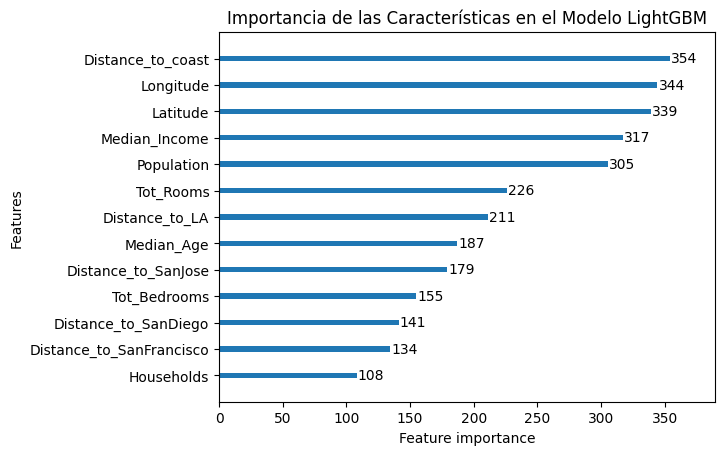

In [64]:
lgb.plot_importance(lgb_model)
plt.title('Importancia de las Características en el Modelo LightGBM')
plt.grid(False)
plt.show()

La variable Distance_to_coast (354) es la característica más relevante, superando a Median_Income. Esto representa una diferencia significativa en comparación con XGBoost. Por otro lado, Distance_to_SanJose (179), Tot_Bedrooms (155), Distance_to_SanDiego (141), Distance_to_SanFrancisco (134) y Households (108) son las características menos relevantes, manteniendo un orden relativo similar a XGBoost, aunque con ligeras variaciones.

Diferencias con XGBoost: La conclusión principal es la variación en el ranking de importancia en comparación con el modelo XGBoost. En LightGBM, las características geográficas directas (Distance_to_coast, Longitude, Latitude) presentan una importancia relativamente mayor que Median_Income en el modelo base. Esto no indica que Median_Income sea menos relevante para el precio de la vivienda, sino que LightGBM, en su configuración base, podría estar utilizando las características geográficas de forma más intensiva para las divisiones de los árboles.

La relevancia significativa de Distance_to_coast, Longitude y Latitude en LightGBM destaca que la ubicación es un predictor extremadamente potente del precio de la vivienda en California, superando incluso al ingreso medio en esta instancia particular del modelo base.

In [65]:
# Inicio del conteo de tiempo antes del entrenamiento del modelo
start_time = time.time()

# Parámetros para GridSearchCV
param_grid_lgbm = {
    'n_estimators': [100, 200, 300], # Número de árboles
    'learning_rate': [0.01, 0.1, 0.3], # Tasa de aprendizaje
    'max_depth': [3, 5, 7]  # Profundidad máxima del árbol
}

# Nuevo modelo para la búsqueda de hiperparámetros
lgb_model = lgb.LGBMRegressor(
    objective = 'regression',
    random_state = 42
)

# GridSearchCV para optimizar el modelo
grid_search_lgbm = GridSearchCV(
    estimator = lgb_model,
    param_grid = param_grid_lgbm,
    cv = 5, # 5 fold cross-validation
    scoring = 'neg_root_mean_squared_error',
    verbose = 1,  # Muestra el progreso
    n_jobs = -1
)

# Entrenar la búsqueda de hiperparámetros
grid_search_lgbm.fit(X_train, y_train)

# Calculamos el tiempo transcurrido desde el inicio hasta el final del entrenamiento
lgb_optimized_time = time.time() - start_time
print(f'Tiempo de entrenamiento del modelo LightGBM optimizado: {lgb_optimized_time/60:.2f} minutos')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3111
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 13
[LightGBM] [Info] Start training from score 207194.693738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Igual que con XGBoost, se realizaron 135 entrenamientos de modelos para encontrar la mejor combinación

La optimización del modelo LightGBM utilizando GridSearchCV se completó en 1.12 minutos, lo cual es inferior al tiempo requerido por XGBoost en el mismo proceso. Esto destaca la superioridad de LightGBM en cuanto a la velocidad de entrenamiento al manejar grandes volúmenes de combinaciones.

In [66]:
print('Mejores parámetros encontrados para LightGBM:', grid_search_lgbm.best_params_)

Mejores parámetros encontrados para LightGBM: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


Los hiperparámetros óptimos identificados por GridSearchCV para LightGBM en este conjunto de datos son equivalentes a los mejores parámetros hallados para XGBoost. Este hallazgo indica que, dentro de los rangos explorados, estas configuraciones de modelo (número de árboles, tasa de aprendizaje, profundidad máxima) son robustas y eficaces para ambos algoritmos de boosting.

In [67]:
# Hacer predicciones con el mejor modelo
lgb_model_optimized = grid_search_lgbm.best_estimator_
y_pred_optimized_lgbm = lgb_model_optimized.predict(X_test)

In [68]:
# RMSE optimizado
rmse_optimized_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_optimized_lgbm))
print(f'RMSE del modelo LightGBM optimizado: {rmse_optimized_lgbm:.2f}')

RMSE del modelo LightGBM optimizado: 44447.89


El RMSE ha mostrado una mejora notable, disminuyendo de 46,640.21 (base) a 44,447.89 (optimizado), lo que representa una reducción de $2,192.32.

In [70]:
mape_lgbm_optimizado = np.mean(np.abs((y_test - y_pred_optimized_lgbm) / y_test)) * 100
print(f'MAPE del modelo LightGBM optimizado: {mape_lgbm_optimizado:.2f}%')

MAPE del modelo LightGBM optimizado: 16.45%


El MAPE ha experimentado una mejora significativa, pasando del 17.50% en su estado base al 16.45% en su versión optimizada, lo que representa una reducción de 1.05 puntos porcentuales.

LightGBM optimizado presenta un RMSE que es aproximadamente $300 inferior al de XGBoost optimizado. Esto lo posiciona como el modelo de mejor rendimiento en términos de RMSE.

XGBoost optimizado presenta un MAPE del 16.12%, lo que resulta en un desempeño ligeramente superior en comparación con LightGBM optimizado, que tiene un MAPE del 16.45%. Esto indica que, en promedio, el error porcentual en las predicciones de XGBoost es inferior al de LightGBM.

In [76]:
import joblib

# Guardar solo el mejor modelo
joblib.dump(lgb_model_optimized, 'modelo_lightgbm_optimizado.pkl')

print("Modelo LightGBM optimizado se guardó correctamente")

Modelo LightGBM optimizado se guardó correctamente


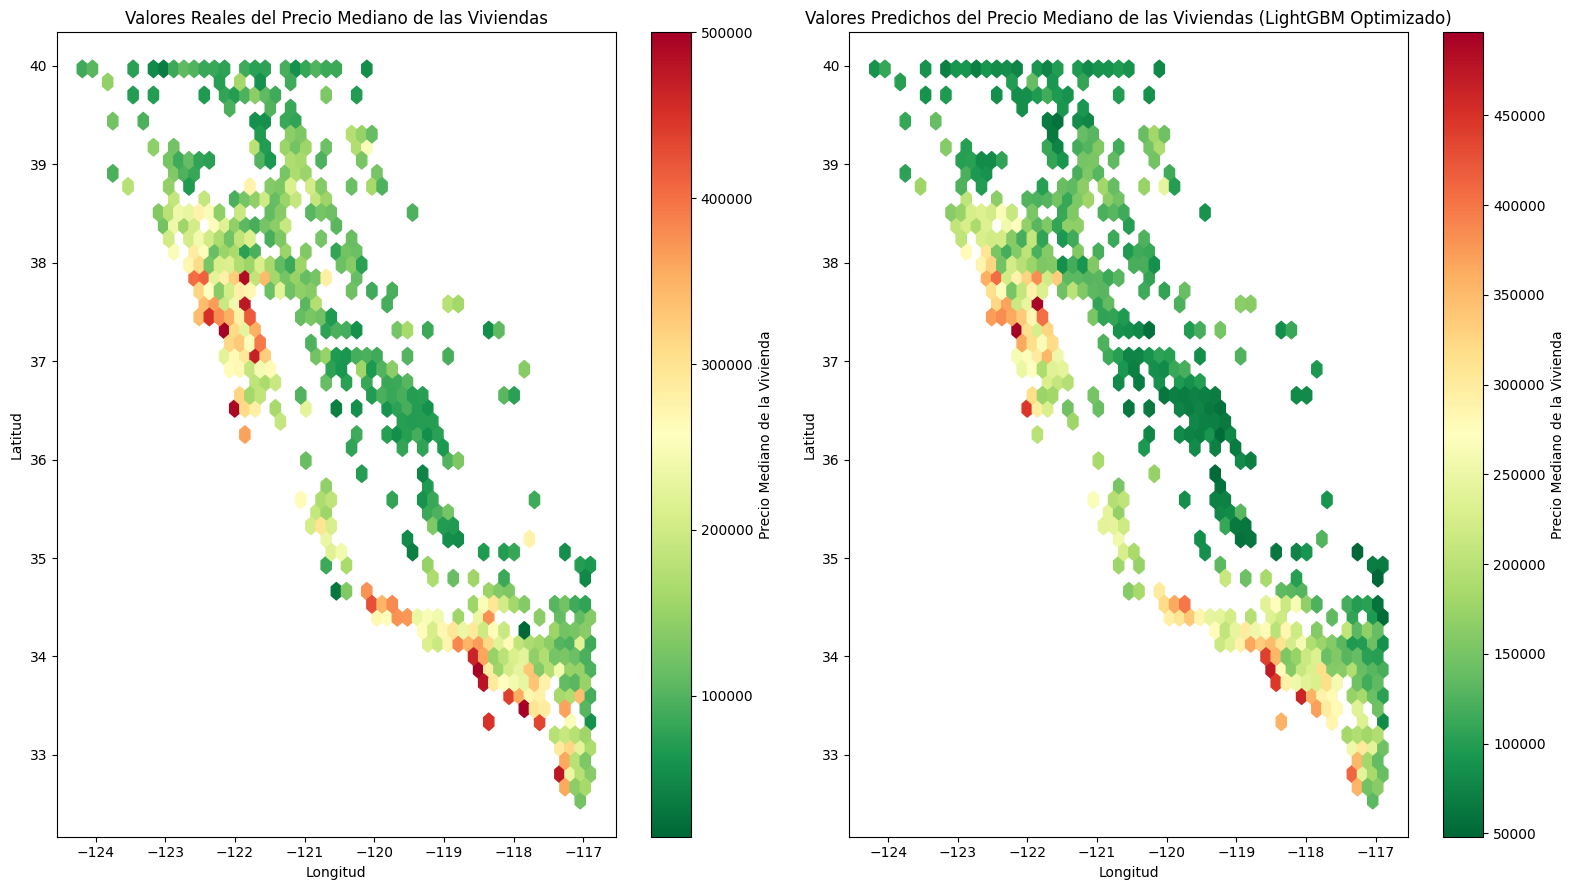

In [71]:
# Gráfico
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# Gráfico 1: Valores Reales del Precio Mediano de las Viviendas (se mantiene igual, ya que son los valores verdaderos)
hb1 = ax[0].hexbin(
    X_test['Longitude'],
    X_test['Latitude'],
    C=y_test, # Colorea según el valor mediano real de la vivienda
    reduce_C_function = np.mean,
    gridsize=50, # Ajusta el tamaño de los hexágonos según se desee
    cmap='RdYlGn_r', # Mapa de colores Rojo-Amarillo-Verde, bueno para precios
    mincnt=1 # Número mínimo de puntos en un bin para ser mostrado
)
ax[0].set_title('Valores Reales del Precio Mediano de las Viviendas')
ax[0].set_xlabel('Longitud')
ax[0].set_ylabel('Latitud')
fig.colorbar(hb1, ax=ax[0], label='Precio Mediano de la Vivienda')

# Gráfico 2: Valores Predichos del Precio Mediano de las Viviendas (con LightGBM optimizado)
hb2 = ax[1].hexbin(
    X_test['Longitude'],
    X_test['Latitude'],
    C=y_pred_optimized_lgbm, # Colorea según el valor mediano predicho por LightGBM
    reduce_C_function = np.mean,
    gridsize=50,
    cmap='RdYlGn_r',
    mincnt=1
)
ax[1].set_title('Valores Predichos del Precio Mediano de las Viviendas (LightGBM Optimizado)')
ax[1].set_xlabel('Longitud')
ax[1].set_ylabel('Latitud')
fig.colorbar(hb2, ax=ax[1], label='Precio Mediano de la Vivienda')

plt.tight_layout() # Ajusta los parámetros de los subplots para un diseño ajustado
plt.show()

El modelo LightGBM ha demostrado una excelente capacidad para replicar las tendencias geográficas de los precios de las viviendas. Las áreas con precios elevados (rojo/naranja, comúnmente en regiones costeras y áreas metropolitanas como Los Ángeles, San Diego y la Bahía de San Francisco) y las de precios bajos (verde, en el interior y el norte rural) son muy consistentes entre los valores reales y los predichos.

El mapa generado por LightGBM presenta una notable similitud con el mapa de valores reales. Esto sugiere que el modelo ha logrado captar de manera efectiva las complejas relaciones espaciales entre las características geográficas y el valor de la vivienda.

#**5. Evaluación y Selección del Modelo**


---

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [53]:
# Métricas para XGBoost

# Predicciones del modelo optimizado
y_pred_xgb = y_pred_optimized

# Métricas de evaluación
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

# Mostramos las métricas
print(f"RMSE (XGBoost): {rmse_xgb:.2f}")
print(f"MAE (XGBoost): {mae_xgb:.2f}")
print(f"R2 Score (XGBoost): {r2_xgb:.4f}")
print(f"MAPE (XGBoost): {mape_xgb:.2f}%")

RMSE (XGBoost): 44747.70
MAE (XGBoost): 28844.61
R2 Score (XGBoost): 0.8472
MAPE (XGBoost): 16.12%


Los resultados de las métricas para el modelo XGBoost optimizado evidencian su solidez. Un RMSE de 44,747.70 indica que, en promedio, las predicciones se desvían de los valores reales en esta cantidad, mientras que un MAE de $28,844.61 sugiere un error absoluto promedio menor. El R2 Score de 0.8472 es notable, ya que indica que el modelo explica aproximadamente el 84.72% de la variabilidad en los precios de las viviendas, lo que refleja una alta capacidad predictiva. Por último, el MAPE del 16.12% respalda una precisión relativa robusta, señalando que el error porcentual promedio de las predicciones es aceptable dentro del rango de precios de las viviendas.

In [54]:
# Métricas para LightGBM

# Predicciones del modelo optimizado
y_pred_lgb = y_pred_optimized_lgbm

# Métricas de evaluación
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgbm = mean_absolute_error(y_test, y_pred_lgb)
r2_lgbm = r2_score(y_test, y_pred_lgb)
mape_lgbm = np.mean(np.abs((y_test - y_pred_lgb) / y_test)) * 100

# Mostrar resultados
print(f"RMSE (LightGBM): {rmse_lgbm:.2f}")
print(f"MAE (LightGBM): {mae_lgbm:.2f}")
print(f"R2 Score (LightGBM): {r2_lgbm:.4f}")
print(f"MAPE (LightGBM): {mape_lgbm:.2f}%")

RMSE (LightGBM): 44447.89
MAE (LightGBM): 29317.66
R2 Score (LightGBM): 0.8492
MAPE (LightGBM): 16.45%


El modelo LightGBM optimizado demuestra un rendimiento sobresaliente, evidenciado por sus métricas. Con un RMSE de 44,447.89, supera ligeramente a XGBoost en error cuadrático medio. Su MAE de $29,317.66 es comparable, y un R² Score de 0.8492 indica una mayor capacidad para explicar la variabilidad en los precios. El MAPE del 16.45% revela que las predicciones son porcentualmente precisas, aunque algo más dispersas que las de XGBoost.

In [55]:
# Guardamos los resultados para comparación posterior
model_performance = {}

# Datos de los modelos utilizados:
model_performance['XGBoost'] = {'RMSE': rmse_xgb, 'MAE': mae_xgb, 'MAPE': mape_xgb, 'R2': r2_xgb}
model_performance['LightGBM'] = {'RMSE': rmse_lgbm, 'MAE': mae_lgbm, 'MAPE': mape_lgbm, 'R2': r2_lgbm}

In [56]:
# Convertimos el diccionario a DataFrame
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
performance_df = performance_df.sort_values(by='RMSE', ascending=True)
performance_df

,RMSE,MAE,MAPE,R2
LightGBM,44447.890332,29317.659728,16.452489,0.849237
XGBoost,44747.698978,28844.608676,16.118660,0.847196


La tabla de rendimiento integra las métricas esenciales de ambos modelos optimizados, permitiendo una comparación visual y directa de su efectividad. LightGBM presenta un RMSE ligeramente inferior (44,447.89 frente a 44,747.70) y un R2 Score marginalmente superior (0.8492 frente a 0.8472), sugiriendo una capacidad predictiva superior. Por otro lado, XGBoost exhibe un MAE (28,844.61 frente a 29,317.66) y un MAPE (16.12% frente a 16.45%) más bajos, indicando errores absolutos y porcentuales promedio más pequeños. Esta leve variación en el rendimiento sugiere que ambos modelos son altamente competitivos y adecuados para este proyecto.

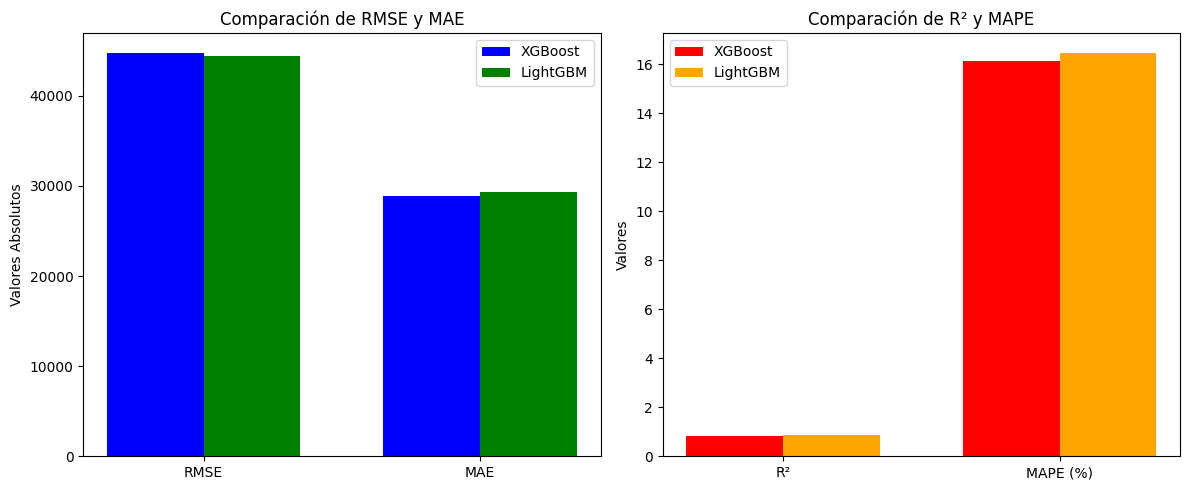

In [57]:
# Nombres de las métricas
metrics = ['RMSE', 'MAE']
metrics_r2_mape = ['R²', 'MAPE (%)']

# Valores para XGBoost y LightGBM
xgb_metrics = [rmse_xgb, mae_xgb, r2_xgb, mape_xgb]
lgb_metrics = [rmse_lgbm, mae_lgbm, r2_lgbm, mape_lgbm]

# Posiciones
x1 = np.arange(len(metrics))
x2 = np.arange(len(metrics_r2_mape))
width = 0.35  # Ancho de las barras

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para RMSE y MAE
axs[0].bar(x1 - width/2, xgb_metrics[:2], width, label='XGBoost', color='blue')
axs[0].bar(x1 + width/2, lgb_metrics[:2], width, label='LightGBM', color='green')
axs[0].set_xticks(x1)
axs[0].set_xticklabels(metrics)
axs[0].set_title('Comparación de RMSE y MAE')
axs[0].set_ylabel('Valores Absolutos')
axs[0].legend()

# Gráfico para R² y MAPE
axs[1].bar(x2 - width/2, xgb_metrics[2:], width, label='XGBoost', color='red')
axs[1].bar(x2 + width/2, lgb_metrics[2:], width, label='LightGBM', color='orange')
axs[1].set_xticks(x2)
axs[1].set_xticklabels(metrics_r2_mape)
axs[1].set_title('Comparación de R² y MAPE')
axs[1].set_ylabel('Valores')
axs[1].legend()

plt.tight_layout()
plt.show()



Los gráficos de barras proporcionan una comparación clara del rendimiento entre los modelos XGBoost y LightGBM. En el primer gráfico, LightGBM muestra una ligera ventaja en RMSE con una barra más baja, mientras que XGBoost presenta un MAE ligeramente inferior. El segundo gráfico revela que el R2 Score es similar para ambos modelos, indicando que explican una proporción comparable de la varianza y validan su capacidad predictiva. La ligera superioridad de XGBoost en MAPE sugiere errores porcentuales promedio menores.

In [58]:
tiempos = pd.DataFrame({
    'Modelo': ['XGBoost Optimizado', 'LightGBM Optimizado'],
    'Tiempo de Entrenamiento (m)': [round(xgb_optimized_time/60, 2), round(lgb_optimized_time/60, 2)]
})

print("\nComparación de Tiempos de Entrenamiento:")
display(tiempos.sort_values('Tiempo de Entrenamiento (m)'))


Comparación de Tiempos de Entrenamiento:


,Modelo,Tiempo de Entrenamiento (m)
1,LightGBM Optimizado,0.84
0,XGBoost Optimizado,1.87


La comparación se centra en los modelos optimizados. Podemos observar que **LightGBM entrena más rápido que XGBoost**, lo que representa una ventaja importante cuando se trabaja con grandes volúmenes de datos o se requiere reentrenamiento frecuente.

Como referencia, los modelos **base (sin optimización)** se entrenaron en:
- **0.01 min** para LightGBM base
- **0.05 min** para XGBoost base